<a id="Title"></a>
# <span style="color:teal;font-weight:bold;">Spaceship Titanic 💡 Feature engineering</span>

This notebook is the second part of my <span style="font-weight:bold;color:green">Spaceship Titanic series</span>:

1. <a href="https://www.kaggle.com/code/fertmeneses/spaceship-titanic-getting-familiar/edit/run/191353629">Spaceship Titanic 🏁 Getting familiar</a>.
2. <span style="font-weight:bold">Spaceship Titanic 💡 Feature engineering.</span> [This notebook]
3. Spaceship Titanic 🩹 Data imputation. (Coming soon)
4. Spaceship Titanic 🖥️ Model optimization. (Coming soon)
5. Spaceship Titanic 🔭 Integrated analysis. (Coming soon)

Previously, I got a clear picture of the scoring expectation for this competition by studying the Leaderboard and trying simple Machine Learning models with minimally edited data. From that experience, I learned that scores above 0.80 are pretty good, but <span style="font-weight:bold;">my aim is getting a score above 0.81, looking for a place among the top 5% submissions</span>.

<div style="color:white;
    display:fill;
    border-radius:15px;
    margin-left: 45px;
    margin-right: 45px;
    background-color:lightblue;
    font-size:105%;
    font-family:Verdana;
    letter-spacing:0.5px">

<p style="padding: 20px;color:black;text-align:center;">
In this notebook, I focus on <span style="font-weight:bold;">feature engineering</span> and improving the submission scores using simple ML models.

</p>
</div>



In the future notebooks, I'll fix the missing values using data imputation techniques, optimize the Machine Learning model and finally make an integrated analysis based on my results and a deep study of other kagglers' contributions.

The methodology of this work is based on my previous notebook <a href="https://www.kaggle.com/code/fertmeneses/titanic-kaggle-full-analysis">Titanic/Kaggle -Full analysis</a> from the <span style="font-style:italic;">Titanic - Machine Learning from Disaster</span> competition.

<hr>

# <font color='teal'>Outline</font> <a class="anchor"  id="Outline"></a>

[**Data analysis**](#Data_analysis)

  - [Load original data](#Data_analysis_load)
  
  - [Distribution of values and transported rates](#Data_analysis_values_rates)
  
  - [Correlations I (original data)](#Data_analysis_correlations)
  
[**Feature engineering**](#Feature_engineering)

  - [Single features](#Feature_engineering_single)

    - ["PassengerId": new feature "GroupMembers"](#DA_FE_GroupMembers)
   
    - ["CryoSleep": make boolean](#DA_FE_CryoSleep)
   
    - ["Cabin": new features "Cabin_1st" and "Cabin_isP"](#DA_FE_Cabin)
    
    - ["Destination" redefinition](#DA_FE_Destination)
   
    - ["VIP": make boolean](#DA_FE_VIP)
   
    - [Expense features redefinition](#DA_FE_Expenses_redefinition)
   
    - [Expense features: new features "X_Range"](#DA_FE_Expense_Range)
   
    - ["Name" feature: new feature "Ocurrence_LastName"](#DA_FE_Name)
   
    - [Correlations II (original and single engineered features)](#Feature_engineering_single_corr)
   
  - [Combined features](#Feature_engineering_combined)

    - ["FromTo" new feature (from "HomePlanet" and "Destination")](#DA_FE_FromTo)
   
    - [Expense-related new family of features (from "ExpFC", "ExpSM", "ExpRS", "ExpSpa" and "ExpVR")](#DA_FE_Expense_ratio)
   
    - [Correlations III (all features)](#Feature_engineering_corr3)
   
[**Submission results**](#Submission_results)

  - [Try models](#Try_models)
    
  - [Analyze results](#Analyze_results)
  
[**Conclusions**](#Conclusions)

<a id="Data_analysis"></a>
# <span style="color:teal;font-weight:bold;">Data analysis</span>

In this section, I load the original data and analyze it without any edition. This is the workflow:

- Load raw data.

- Analyze distribution of values and <span style="font-weight:bold;">Transported</span> rates.

- Analyze correlations.

<a id="Data_analysis_load"></a>
## <span style="color:teal;font-weight:bold;">Load original data</span>

In the following lines, I load the original datasets and get this information:

- Example for 5 first rows in training dataset.

- Number of rows in both datasets.

- Features' names and data types.

- Number of missing values in both datasets, per feature and per row.

In [1]:
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2024-08-29 08:03:31.336546


In [2]:
import pandas as pd
import numpy as np
from termcolor import colored

# Load original datasets:
train_df = pd.read_csv('kaggle/input/spaceship-titanic/train.csv') # Training dataset
test_df = pd.read_csv('kaggle/input/spaceship-titanic/test.csv') # Testing dataset
# Keep the passengerID features separately:
train_ID = train_df['PassengerId']
test_ID = test_df['PassengerId']
# Display a few examples:
display(train_df.head(5)) # Examples
# Print global information:
print('\nNumber of rows in train/test datasets:\n')
print(len(train_df),'/',len(test_df))
print('\nFeatures: names and data types:\n')
print(train_df.dtypes)
# Print number of missing values per feature:
print('\nMissing values in train/test datasets:\n')
for col in test_df.columns:
    # Count missing values:
    N_train = train_df[col].isna().sum() 
    N_test = test_df[col].isna().sum()
    # Print results:
    color_train = 'red' if N_train else 'green'
    color_test = 'red' if N_test else 'green'
    rmargin = 40-len(col)
    print(f'{col}:',f'{colored(N_train, color_train)}/{colored(N_test, color_test)}'.rjust(rmargin))
# Count missing values in each row:
N_nan_train = train_df.apply(lambda x: x.isna().sum(), axis=1)
N_nan_test = test_df.apply(lambda x: x.isna().sum(), axis=1) 
# Print number of rows with N missing values:
for n in set(N_nan_train).union(set(N_nan_test)):
    print(f'Number of rows with {n} missing values: {sum(N_nan_train==n)}/{sum(N_nan_test==n)}')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True



Number of rows in train/test datasets:

8693 / 4277

Features: names and data types:

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

Missing values in train/test datasets:

PassengerId:         0/0
HomePlanet:       201/87
CryoSleep:        217/93
Cabin:           199/100
Destination:      182/92
Age:              179/91
VIP:              203/93
RoomService:      181/82
FoodCourt:       183/106
ShoppingMall:     208/98
Spa:             183/101
VRDeck:           188/80
Name:             200/94
Number of rows with 0 missing values: 6606/3281
Number of rows with 1 missing values: 1867/879
Number of rows with 2 missing values: 203/113
Number of rows with 3 missing values: 17/4


<a id="Data_analysis_values_rates"></a>
## <span style="color:teal;font-weight:bold;">Distribution of values and Transported rates</span>

For a better understanding of each feature, I <span style="font-weight:bold;">plot the normalized distribution of values (column 1) in both training and testing datasets; and the Transported rates for the training dataset (column 2)</span>. Those feature with more than 10 unique values are not included in the plots.

But first, let's find out the general **Transported** rate in the training dataset:

In [3]:
surv_rate_train = sum(train_df['Transported'])/len(train_df)
print('Survival rate in training dataset:',np.round(surv_rate_train,4))

Survival rate in training dataset: 0.5036


In [4]:
# Define plotting functions:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_dist_pie(df_train,df_test,feature,axis):
    """
    Plots a pie chart for the distribution of values from a single
    feature in both training and testing datasets.
    --- Inputs ---
    {df_train, df_test} [Dataframes]: Training and testing datasets.
    Both datasets must include the column with the input name {feature}.
    {feature} [String]: Name of the column (feature) to be analyzed.
    {axis} [matplotlib axis object]: Axis for the current subplot.
    """
    # Identify data, count frequency per variable and sort it alphabetically:
    train_data, test_data = df_train[feature], df_test[feature]
    train_counts = train_data.value_counts().sort_index()
    test_counts = test_data.value_counts().sort_index()
    # Plot pie chart, start with the outer ring:
    axis.pie(train_counts, colors=sns.color_palette('tab20'),
             labels=train_counts.keys(),labeldistance=0.8,
             startangle=90,frame=True,explode=np.ones(len(train_counts))*0.01)
    # Add white ring to separate training and testing pies:
    axis.add_artist(plt.Circle((0,0),0.70,color='black', fc='white',linewidth=0))
    # Testing inner pie:
    axis.pie(test_counts, colors=sns.color_palette('tab20'),
             labels=None,labeldistance=0.6,
             radius=0.5,startangle=90,explode=np.ones(len(test_counts))*0.01)
    # Add white central circle to complete the pie:
    axis.add_artist(plt.Circle((0,0),0.25,color='black', fc='white',linewidth=0))
    # Set title:
    axis.set_title(f'{feature}: Distribution')
    
def plot_dist_hist(df_train,df_test,feature,axis,bin_step=None):
    """
    Plots a histogram chart for the distribution of values from a
    single feature in both training and testing datasets.
    --- Inputs ---
    {df_train, df_test} [Dataframes]: Training and testing datasets.
    Both datasets must include the column with the input name {feature}.
    {feature} [String]: Name of the column (feature) to be analyzed.
    {axis} [matplotlib axis object]: Axis for the current subplot.
    {bin_step} [Integer or None]: If provided, set the bins' 
    step-value for the histogram, otherwise automatically assigned.
    """
    # Identify relevant data and calculate fraction of valid values:
    train_data, test_data = df_train[feature], df_test[feature]
    train_frac = np.round(train_data.count()/len(train_data)*100,1) # [%]
    test_frac = np.round(test_data.count()/len(test_data)*100,1) # [%]
    # Determine binning, uniform for both datasets:
    min_range = min(min(train_data),min(test_data))
    max_range = max(max(train_data),max(test_data))
    if bin_step:
        binning = np.arange(min_range,max_range+bin_step*2,bin_step)-bin_step/2
    else:
        binning = np.linspace(min_range,max_range,10)
    # Bar plot:
    train_data.plot(kind='hist', bins=binning, edgecolor='navy', color='teal',
                    ax=axis, density=True, alpha=0.6)
    test_data.plot(kind='hist', bins=binning, edgecolor='navy', color='orange',
                   ax=axis, density=True, alpha=0.6, rwidth=0.7)
    axis.legend(['Train','Test']) # Set legend   
    axis.set_yticks([])#, minor=False)
    axis.set(xlabel=feature, ylabel='Density')
    axis.set_title(f'{feature}: Distribution')
    for s in ["top","right","left", 'bottom']: # Remove spins
        axis.spines[s].set_visible(False)

def plot_swarm(df_train,feature,axis,ref_feature='Transported',
               xlabels_off=False,seed=42):
    """
    Plots a swarm plot ordered by the transported rate from a 
    single feature in the training dataset.
    --- Inputs ---
    {df_train} [Dataframe]: Training dataset, must include the
    columns with names {feature} and {ref_feature}.
    {feature} [String]: Name of the column (feature) to be analyzed.
    {ref_feature} [String]: Name of the column (feature) by which {feature} will
    be analyzed. This feature must be binary with values 0 and 1.
    {axis} [matplotlib axis object]: Axis for the current subplot.
    {xlabels_off} [Boolean]: If True, remove the x-labels.
    {seed} [Integer]: Seed for random scattering in swarm plots.
    """
    # Identify data, count frequency per variable and sort it alphabetically:
    train_data = df_train[feature] # Training dataset    
    train_counts = train_data.value_counts().sort_index()
    # For each variable, identify the transported rate and build the swarm plot:
    np.random.seed(seed) # Random seed for swarm plots
    for i, var in enumerate(train_counts.keys()):
        # Determine points' location:
        surv_rate = df_train.groupby([feature]).mean(numeric_only=True)[ref_feature].loc[var] # Transported rate
        pp_pos = int(len(df_train[(df_train[feature]==var)])*surv_rate) # Positive transported values
        pp_neg = int(len(df_train[(df_train[feature]==var)])*(1-surv_rate)) # Negative transported values
        var_pos = np.random.uniform(0, surv_rate,pp_pos) # Randomly assign locations for "positive" points
        var_neg = np.random.uniform(surv_rate,1,pp_neg) # Randomly assign locations for "negative" points              
        # Allocate all points in plot:
        color = np.array(sns.color_palette('tab20')[i])
        axis.scatter(i+np.random.uniform(-0.3, 0.3, len(var_neg)), var_neg,s=10,
                     color=color, edgecolor=np.append(color,0.2),
                     alpha=0.1, label=f'{var}({ref_feature}=0)')
        axis.scatter(i+np.random.uniform(-0.3, 0.3, len(var_pos)), var_pos,s=10,
                     color=color, edgecolor=np.append(color,0.2),
                     label=f'{var}({ref_feature}=1)')
        axis.plot([i-0.3,i+0.3],[surv_rate,surv_rate],ls='--',color='k',lw=1)
    # Ticks and limits:
    axis.set_xlim(-0.5, len(train_counts)-0.5)
    axis.set_ylim(-0.03, 1.1)
    if xlabels_off:
        axis.set_xticks([])
        axis.set_xticklabels([])
    else:
        axis.set_xticks(np.linspace(0,len(train_counts.keys())-1,len(train_counts.keys())))
        axis.set_xticklabels(train_counts.keys(), fontsize=10)
    axis.set_yticks([], minor=False)
    axis.set_ylabel('')
    # Spines, legend and title:
    for s in ["top","right","left", 'bottom']:
        axis.spines[s].set_visible(False)
    axis.legend([0,1],title=ref_feature,loc=(0.8, 0.7), edgecolor='k')
    axis.set_title(f'{feature}: "{ref_feature}" rate (Train)')

import warnings # <sns.kdeplot> gives a warning I couldn't fix, I avoid displaying it...
warnings.simplefilter(action='ignore', category=FutureWarning)

def plot_KDE(df_train,feature,axis,ref_feature='Transported'):
    """
    Plots a kernel density estimate (KDE) plot ordered by the 
    transported rate from a single feature in the training dataset.
    --- Inputs ---
    {df_train} [Dataframe]: Training dataset, must include the
    columns with names {feature} and {ref_feature}.
    {feature} [String]: Name of the column (feature) to be analyzed.
    {ref_feature} [String]: Name of the column (feature) by which {feature} will
    be analyzed. This feature must be binary with values 0 and 1.
    {axis} [matplotlib axis object]: Axis for the current subplot.
    """    
    train_data = df_train[feature] # Identify relevant data
    # Plot KDE:
    sns.kdeplot(x=feature, data=df_train, ax=axis, fill=True,cut=0,
                bw_method=0.15, lw=1.4, edgecolor='lightgray', hue=ref_feature,
                multiple="stack", palette='PuBu', alpha=0.8)
    axis.set_yticks([], minor=False)
    axis.set_ylabel('Density')
    axis.set_title(f'{feature}: "{ref_feature}" rate (Train)')
    for s in ["top","right","left", 'bottom']: # Remove spins
        axis.spines[s].set_visible(False)  

def explain_stats(df_train,feature,unique_vals_max=10):
    """
    Explains the distribution of values in a table format and the
    transported rates for the training dataset.
    --- Inputs ---
    {df_train} [Dataframe]: Training dataset, must include the
    columns with names {feature} and {ref_feature}.
    {feature} [String] Name of the column (feature) to be analyzed.
    {unique_vals_max} [Integer]: Maximum number of unique values 
    for the feature. If there are more than this limit, there 
    won't be any output table.
    """
    # Check the unique_vals_max condition (avoid NaN):
    unique_vals = {x for x in df_train[feature] if x == x} # Number of unique values
    if len(unique_vals) > unique_vals_max:
        print(f'There are {len(unique_vals)} unique values for this feature, more than the allowed limit ({unique_vals_max}).')
        return None    
    # Explained values:
    df_expl = pd.DataFrame(columns=[f'{feature}','#Passengers','Transported_Rate[%]'])
    df_expl[f'{feature}'] = sorted(unique_vals)
    df_expl['#Passengers'] = [len(df_train[df_train[f'{feature}'] == x])
                              for x in sorted(unique_vals)]
    # Transported rates for each feature category:
    df_expl['Transported_Rate[%]'] = [
        len(df_train[(df_train[feature] == x) & # Select fare range
            (df_train['Transported'] == 1)])/ # Passengers who were transported
        len(df_train[(df_train[feature] == x)]) # Total passengers
        for x in sorted(unique_vals) # Iterate through all feature categories
    ]
    df_expl['Transported_Rate[%]'] *=100 # Convert from fraction to [%]
    print(f'Explained {feature} values and transported rates in training dataset:')
    display(df_expl.style.hide())

---------- HomePlanet | Outer:train, Inner:test ----------


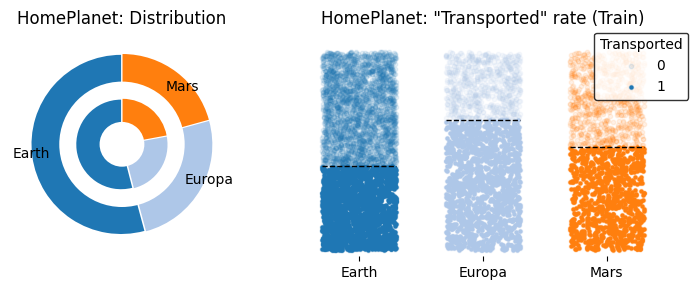

Explained HomePlanet values and transported rates in training dataset:


HomePlanet,#Passengers,Transported_Rate[%]
Earth,4602,42.394611
Europa,2131,65.884561
Mars,1759,52.302445


---------- CryoSleep | Outer:train, Inner:test ----------


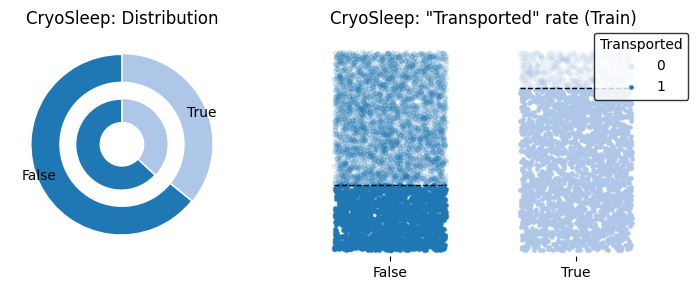

Explained CryoSleep values and transported rates in training dataset:


CryoSleep,#Passengers,Transported_Rate[%]
False,5439,32.892076
True,3037,81.758314


---------- Destination | Outer:train, Inner:test ----------


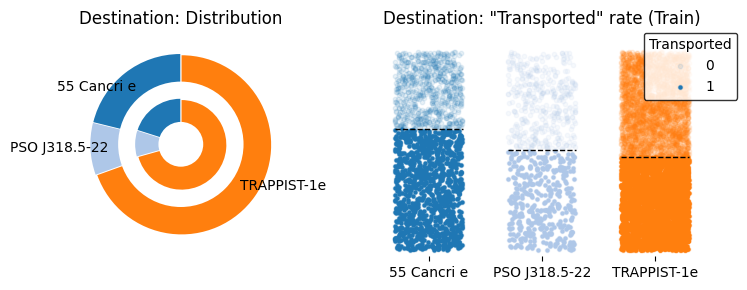

Explained Destination values and transported rates in training dataset:


Destination,#Passengers,Transported_Rate[%]
55 Cancri e,1800,61.000000
PSO J318.5-22,796,50.376884
TRAPPIST-1e,5915,47.117498


------------------------- Age -------------------------


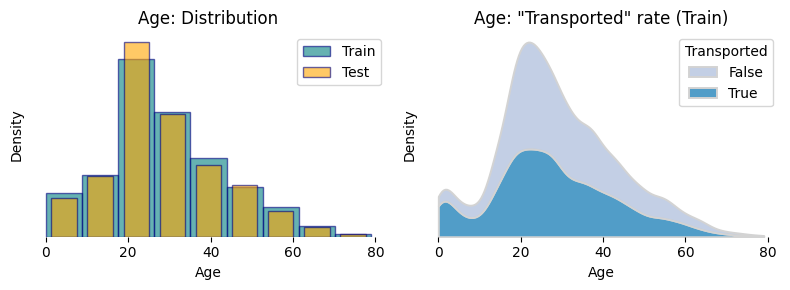

(Not suitable for a table)
---------- VIP | Outer:train, Inner:test ----------


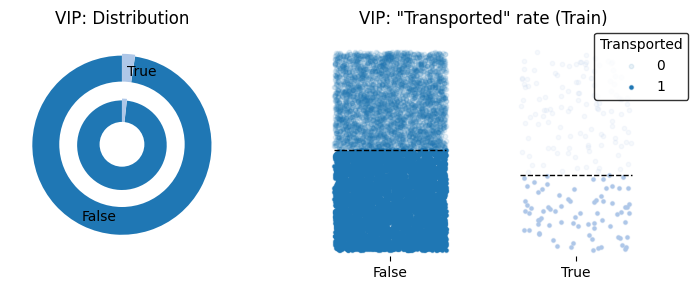

Explained VIP values and transported rates in training dataset:


VIP,#Passengers,Transported_Rate[%]
False,8291,50.633217
True,199,38.190955


------------------------- RoomService -------------------------


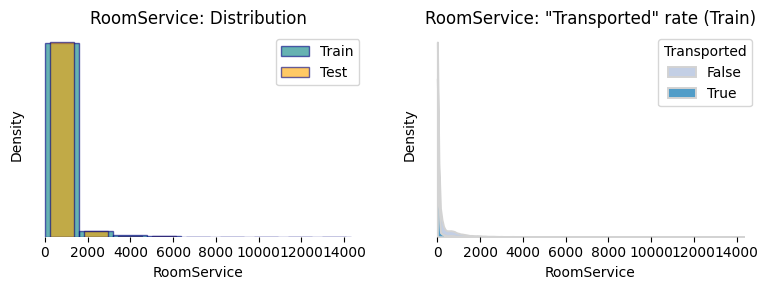

(Not suitable for a table)
------------------------- FoodCourt -------------------------


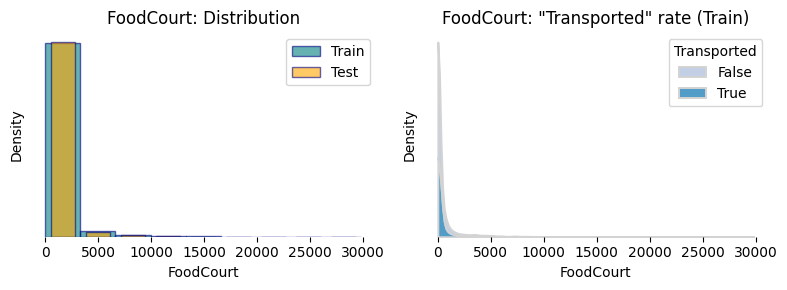

(Not suitable for a table)
------------------------- ShoppingMall -------------------------


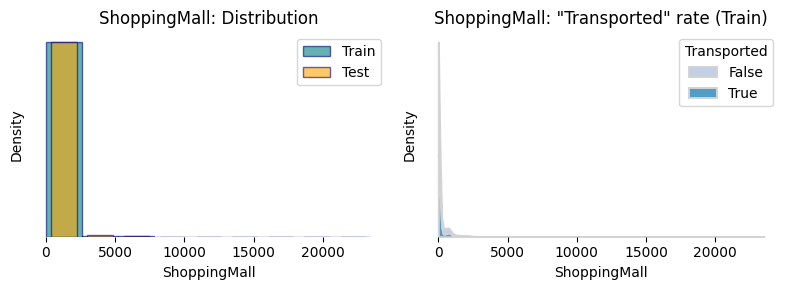

(Not suitable for a table)
------------------------- Spa -------------------------


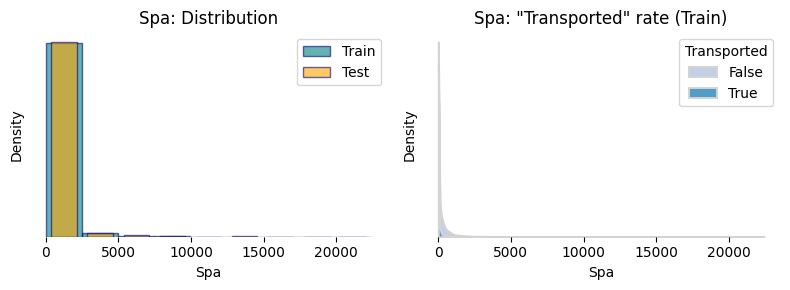

(Not suitable for a table)
------------------------- VRDeck -------------------------


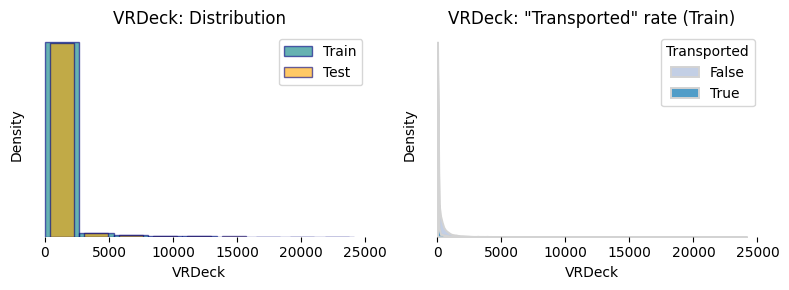

(Not suitable for a table)


In [5]:
# Select features to analyze:
features = [feat for feat in test_df.columns if 
            test_df[feat].dtype != 'object' or # Numeric or...
            test_df[feat].nunique()<10] # ...Few unique values

# Plot distribution of values and Transported rates for each feature:
for feature in features:
    fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(8, 3)) # Start figure
    if train_df[feature].dtype == 'object': # Non-numerical features:
        print('-'*10,f'{feature} | Outer:train, Inner:test','-'*10)
        plot_dist_pie(train_df,test_df,feature,ax1)
        plot_swarm(train_df,feature,ax2)    
    else: # Numerical features:
        print('-'*25,feature,'-'*25)
        plot_dist_hist(train_df,test_df,feature,ax1)
        plot_KDE(train_df,feature,ax2)
    fig.tight_layout()
    plt.show()
    # Display explanatory table only if there are equal or less than 10 unique values:
    if len(set(train_df[feature]))<=10:
        explain_stats(train_df,feature)
    else:
        print('(Not suitable for a table)')

Summary about the distribution of values and **Transported** rates:

| Feature | <font color=blue> Distribution </font> | <font color=green> Transported rates </font> |
| :---: | :--- | :--- |
| <span style="font-weight:bold;">HomePlanet</span> | <font color=blue> Half of the passengers come from Earth, 1/4 from Europa and 1/4 from Mars  </font> | <font color=green> Europa has a slightly good rate (65%), Mars average (50%) and Earth slightly poor (40%) </font> |
| <span style="font-weight:bold;">CryoSleep</span> | <font color=blue> Only 1/3 of passengers were in CryoSleep  </font> | <font color=green> Excellent chances (80%) if Cryosleep, poor (30%) if not </font> |
| <span style="font-weight:bold;">Destination</span> | <font color=blue> 2/3 of passengers were going to Trappist, 1/4 to Cancri and 1/10 to PSO </font> | <font color=green> Those going to Cancri have good chances (60%), the rest average (50%) </font> |
| <span style="font-weight:bold;">Age</span> | <font color=blue> From 0 to 80, peak around 20-30 </font> | <font color=green> Good chances for the very young (less than 10 years old?), maybe average for the rest </font> |
| <span style="font-weight:bold;">VIP</span> | <font color=blue> Only 200 passengers are VIP </font> | <font color=green> VIP passengers have slightly bad chances (40%) </font> |
| <span style="font-weight:bold;">RoomService, FoodCourt, ShoppingMall, Spa, VRDeck</span> | <font color=blue> Most passengers spend minimal amounts on services </font> | <font color=green> Can't tell from the plots </font> |

<a id="Data_analysis_correlations"></a>
## <span style="color:teal;font-weight:bold;">Correlations I (original data)</span>

Next, I study the <span style="font-weight:bold;">correlations in the original data, using the training dataset, only for those features analyzed in the previous section</span>. I build a correlation matrix with a 0.1 threshold correlation value, then only high correlations are painted.

*Note: the correlation matrix needs numerical or boolean features, then non-numerical features are One-Hot encoded, and their family-encoded-features are shown in dotted traingles (correlations there are irrelevant).*

In [6]:
import matplotlib.patches as patches

def encode_and_correlation(df,max_cats=10,target_col='Transported',
                           c_thres=0.1,plot_corr=True):
    """
    Encodes non-numeric features in a dataset and plots the correlation matrix.
    --- Inputs ---
    {df} [dataframe]: Dataframe to be encoded.
    {max_cats} [int]: Maximum number of categories for a non-numeric
    feature to be encoded. If the feature has more categories, it is ignored.
    {ref_col} [string]: Target column, it won't be encoded.
    {c_thres} [float]: Threshold correlation value, only exceeding values
    will be painted in the correlation matrix.
    {plot_corr} [boolean]: If True, plots the correlation matrix. If False, 
    doesn't plot it, but still returns the encoded dataframe.
    --- Outputs ---
    {df_enc} [dataframe]: Encoded dataframe.
    """
    # ===== ENCODING ===== 
    # One-Hot encode non-numerical features with few unique values:
    feat_enc = [feat for feat in df.columns if 
                df[feat].dtype == 'object' and # Numeric or...
                df[feat].nunique()<=max_cats] # ...Few unique values

    # Encode features:
    if len(feat_enc)>1:
        data_enc = pd.get_dummies(df[feat_enc])
        # Prepare dataframes having only numeric/boolean features:
        df_enc = pd.concat([df, data_enc], axis=1)
    else:
        df_enc = df.copy()
    # Sort columns alphabetically, but leave 'Transported' at the beggining in training dataset:
    df_enc = df_enc.reindex(sorted(df_enc.columns), axis=1)
    if target_col in df_enc:
        df_enc = df_enc[['Transported'] + [col for col in df_enc.columns
                                                       if col != target_col ]]
    else:
        df_enc = df_enc[[col for col in df_enc.columns]]
    # Drop source-encoded features: 
    df_enc = df_enc.drop(feat_enc,axis=1)
    # Drop not suitable features:
    feat_not_enc = [feat for feat in df.columns if
                    df[feat].dtype == 'object' and # Numeric or...
                    df[feat].nunique()>10] # ...Few unique values
    df_enc = df_enc.drop(feat_not_enc,axis=1)
    
    # ===== CORRELATION MATRIX ===== 
    if plot_corr:
        # Prepare data:
        corr = df_enc.corr() # Obtain correlations
        trimask = np.triu(np.ones_like(corr, dtype=bool)) # Mask upper triangle in correlations    
        # Plot correlations in training dataset:
        fig, ax = plt.subplots(figsize=(20, 10))
        sns.heatmap(corr, ax=ax, square=True,cmap='coolwarm',
                    vmin=-1, vmax=1, linecolor='w',lw=0.5, 
                    mask=trimask | (np.abs(corr) <= c_thres))
        # Separate the target correlations:
        ax.plot([1,1],[1,len(df_enc.columns)],color='k',lw=2)
        # Draw the correlations' triangle:
        ax.plot([1,len(df_enc.columns)],[1,len(df_enc.columns)],color='k',lw=0.5)
        ax.plot([1,len(df_enc.columns)],[len(df_enc.columns),len(df_enc.columns)],
                color='k',lw=1.5)
        # Identify blocks of similar features:
        main_name = [feat.split('_')[0] for feat in list(df_enc.columns)]
        index_counts = [(main_name.index(name),main_name.count(name))
                        for name in sorted(set(main_name))]
        for index, counts in index_counts:
            if counts>1: 
                triangle = [[index, index],
                            [index+counts, index+counts],
                            [index, index+counts]]
                ax.add_patch(patches.Polygon(triangle, edgecolor="k",facecolor='none',ls="--",lw=2))
        ax.set_title(f"Dataset Correlations", size=15)
        fig.tight_layout()
        plt.show()    
    
    return df_enc

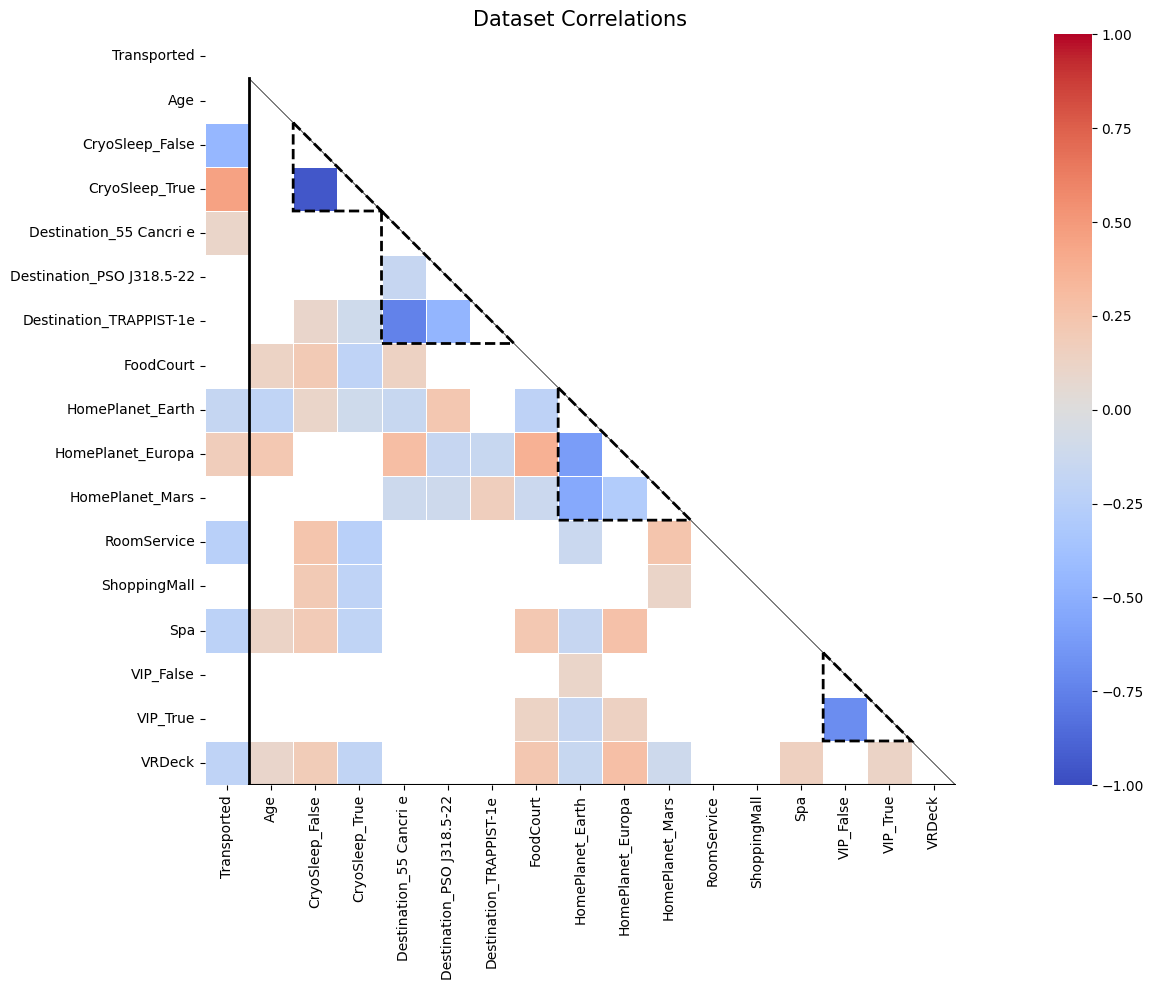

In [7]:
train_df_enc = encode_and_correlation(train_df)

I'm going to do a more detailed analysis later, but from this plot I highlight the following facts:

<span style="font-weight:bold;">Chances of transportation (first column):</span> 
- <span style="font-weight:bold;">CryoSleep</span>: Cryo-sleeping (True) is better.
- <span style="font-weight:bold;">Destination</span>: going to Cancri is better.
- <span style="font-weight:bold;">HomePlanet</span>: being from Earth is worse, from Europa is better. 
- <span style="font-weight:bold;">RoomService</span>: paying more is worse.
- <span style="font-weight:bold;">Spa</span>: paying more is worse.
- <span style="font-weight:bold;">VRDeck</span>: paying more is worse.

<span style="font-weight:bold;">Other observations:</span>

- Cryo-sleeping passengers spend less in services 
(<span style="font-weight:bold;">FoodCourt</span>
<span style="font-weight:bold;">RoomService</span>, 
<span style="font-weight:bold;">ShoppingMall</span>,
<span style="font-weight:bold;">Spa</span>,
<span style="font-weight:bold;">VRDeck</span>).
- The older the passenger, the more more likely is that they are from Europa. On the contrary, younger passengers are more likely to come from Earth.
- The following origin-destinations are more frequent: Europa-Cancri, Earth-PSO, Mars-Trappist.
- Passengers from Mars are more likely to spend more in RoomService and ShoppingMall.
- Passengers from Europa are more likely to spend more in Spa and VRDeck.

<a id="Feature_engineering"></a>
# <span style="color:teal;font-weight:bold;">Feature engineering</span>

In this section, I first engineer single features, extracting encoded information from original features. Later, I generate new variables based on combination of two or more features.

By the end of the data engineering process, each feature in the dataset should be numeric, boolean, or non-numeric with a few unique values (so they are suitable for One-Hot encoding and ML analysis).

<a id="Feature_engineering_single"></a>
## <span style="color:teal;font-weight:bold;">Single features</span>

The original features may contain encoded information that may be stored in new variables, too complex information that could be simplified, or completely irrelevant data that could be deleted.

I analyze the original features in the order given in the dataset:

In [8]:
print('Order in original features:\n',[f for f in test_df.columns])

Order in original features:
 ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name']


I copy the original datasets and label them as "SF" (Single Features). They will contain all original features and those engineered from single features:

In [9]:
# First generate the corrected datasets:
train_df_SF = train_df.copy()
test_df_SF = test_df.copy()

<a id="DA_FE_GroupMembers"></a>
### <span style="color:teal;font-weight:bold;">"PassengerId": new feature "GroupMembers"</span>

According to the official definition:

> <span style="font-weight:bold;">PassengerId</span> - A unique Id for each passenger. <span style="font-weight:bold;">Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group</span>. People in a group are often family members, but not always.

I split <span style="font-weight:bold;">PassengerId</span> into the new features <span style="font-weight:bold;">IDgroup</span> (gggg) and <span style="font-weight:bold;">IDnumber</span> (pp) and study their unique values:

In [10]:
# Training dataset:
train_df_SF['IDgroup'] = train_df['PassengerId'].apply(
    lambda x: int(x.split('_')[0]))
train_df_SF['IDnumber'] = train_df['PassengerId'].apply(
    lambda x: int(x.split('_')[1]))
# Testing dataset:
test_df_SF['IDgroup'] = test_df['PassengerId'].apply(
    lambda x: int(x.split('_')[0]))
test_df_SF['IDnumber'] = test_df['PassengerId'].apply(
    lambda x: int(x.split('_')[1]))

In [11]:
print('Number of unique values in IDgroup (training dataset):', len(set(train_df_SF['IDgroup'])))
print('Number of unique values in IDnumber (training dataset):', len(set(train_df_SF['IDnumber'])))

Number of unique values in IDgroup (training dataset): 6217
Number of unique values in IDnumber (training dataset): 8


There are too many <span style="font-weight:bold;">IDgroup</span> categories, which won't be useful for Machine Learning. However, identifying member's quantity in each group may help... The <span style="font-weight:bold;">IDnumber</span> gives an idea of the minimum number of people within a group, but the whole picture is missing.

I build the new feature <span style="font-weight:bold;">GroupMembers</span>, which identifies for each passenger the number of people sharing their <span style="font-weight:bold;">IDgroup</span>. In order to do that, I consider both training and testing datasets, with the following protocol:

* Identify the ocurrences for each unique value in <span style="font-weight:bold;">IDgroup</span>, in the total training+testing dataset.
  
* Assign the <span style="font-weight:bold;">GroupMembers</span> in each training and testing dataset.

* Drop features <span style="font-weight:bold;">IDgroup</span> and <span style="font-weight:bold;">IDnumber</span>.

In [12]:
# Identify ocurrences for every unique value in IDgroup:
ocurrences = pd.concat([train_df_SF['IDgroup'], test_df_SF['IDgroup']]).value_counts().to_dict()
for dataset in [train_df_SF,test_df_SF]:
    dataset['GroupMembers'] = dataset['IDgroup'].apply(lambda x: ocurrences[x])
# Drop unnecessary features:
for feature in ['PassengerId','IDgroup','IDnumber']:
    if feature in train_df_SF: # Just in case feature is already dropped
        train_df_SF = train_df_SF.drop(feature,axis=1)
        test_df_SF = test_df_SF.drop(feature,axis=1)

Let's see the distribution of values and Transported rates for <span style="font-weight:bold;">GroupMembers</span>:

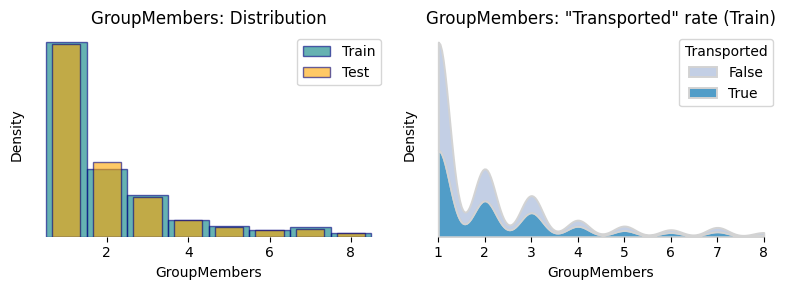

Explained GroupMembers values and transported rates in training dataset:


GroupMembers,#Passengers,Transported_Rate[%]
1,4805,45.244537
2,1682,53.804994
3,1020,59.313725
4,412,64.077670
5,265,59.245283
6,174,61.494253
7,231,54.112554
8,104,39.423077


In [13]:
# Plot distribution of values and Transported rates:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(8, 3)) # Start figure
plot_dist_hist(train_df_SF,test_df_SF,'GroupMembers',ax1,bin_step=1)
plot_KDE(train_df_SF,'GroupMembers',ax2)
fig.tight_layout()
plt.show()
# Display explanatory table:
explain_stats(train_df_SF,'GroupMembers')

<a id="DA_FE_CryoSleep"></a>
### <span style="color:teal;font-weight:bold;">"CryoSleep": make boolean/numeric</span>

<span style="font-weight:bold;">CryoSleep</span> feature is very simple, with only True or False values. I convert True to 1 and False to 0.

In [14]:
for dataset in [train_df_SF,test_df_SF]:
    dataset['CryoSleep'] = dataset['CryoSleep'].apply(
        lambda x: np.nan if x!=x else (1 if x else 0))

<a id="DA_FE_Cabin"></a>
### <span style="color:teal;font-weight:bold;">"Cabin": new features "Cabin_1st" and "Cabin_isP"</span>

The <span style="font-weight:bold;">Cabin</span> feature has too many unique values and couldn't be analyzed properly. Let's look a few examples:

In [15]:
cabin = list(train_df['Cabin'].loc[~train_df['Cabin'].isna()].values)+\
        list(test_df['Cabin'].loc[~test_df['Cabin'].isna()].values)
print(list(set(cabin))[:20])

['B/269/S', 'E/211/P', 'A/92/S', 'F/990/S', 'F/251/P', 'E/377/S', 'B/176/S', 'F/136/S', 'F/143/P', 'B/52/S', 'G/462/S', 'G/1013/S', 'F/882/P', 'E/520/S', 'A/10/P', 'D/67/S', 'D/151/S', 'F/604/P', 'C/259/S', 'G/366/S']


All values follow the same patter: 'Letter/Number/Letter'. I will generate 3 new features accounting for them: <span style="font-weight:bold;">Cabin_1st</span>, <span style="font-weight:bold;">Cabin_2nd</span> and <span style="font-weight:bold;">Cabin_3rd</span>, respectively. Then, I will drop the original <span style="font-weight:bold;">Cabin</span> feature.

In [16]:
cabin_X = ['Cabin_1st','Cabin_2nd','Cabin_3rd']
for i,cabin in enumerate(cabin_X):
    if cabin not in train_df_SF: # In case faeture it's already created
        # Training dataset:
        train_df_SF[cabin] = train_df['Cabin'].apply(
            lambda x: np.nan if x!=x else (
                x.split('/')[i]))
        # Testing dataset:
        test_df_SF[cabin] = test_df['Cabin'].apply(
            lambda x: np.nan if x!=x else (
                x.split('/')[i]))
# Summarize:
for c in cabin_X:
    print(f'Unique values in {c} (training/testing):',
          len({x for x in train_df_SF[c] if x==x}),'/',
          len({x for x in test_df_SF[c] if x==x}))

Unique values in Cabin_1st (training/testing): 8 / 8
Unique values in Cabin_2nd (training/testing): 1817 / 1505
Unique values in Cabin_3rd (training/testing): 2 / 2


Only <span style="font-weight:bold;">Cabin_1st</span> and <span style="font-weight:bold;">Cabin_3rd</span> are suitable for ML models, while <span style="font-weight:bold;">Cabin_2nd</span> has too many unique values.

I drop <span style="font-weight:bold;">Cabin_2nd</span> and <span style="font-weight:bold;">Cabin</span>, and then plot the distribution of values and **Transported** rates for the new features.

---------- Cabin_1st | Outer:train, Inner:test ----------


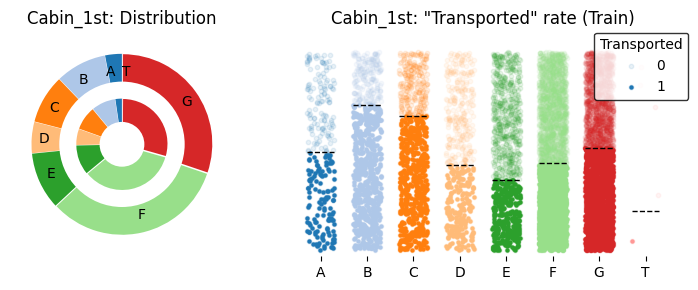

Explained Cabin_1st values and transported rates in training dataset:


Cabin_1st,#Passengers,Transported_Rate[%]
A,256,49.609375
B,779,73.427471
C,747,68.005355
D,478,43.305439
E,876,35.730594
F,2794,43.987115
G,2559,51.621727
T,5,20.000000


---------- Cabin_3rd | Outer:train, Inner:test ----------


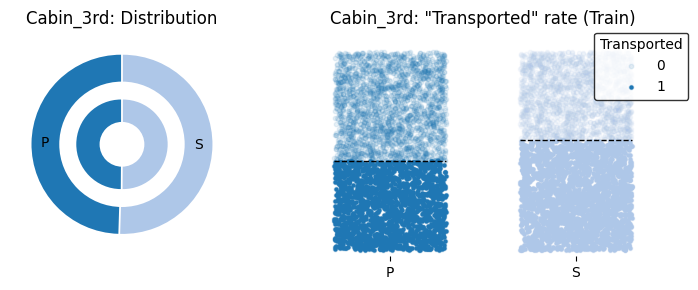

Explained Cabin_3rd values and transported rates in training dataset:


Cabin_3rd,#Passengers,Transported_Rate[%]
P,4206,45.126010
S,4288,55.503731


In [17]:
# Drop unnecessary features:
for feature in ['Cabin','Cabin_2nd']:
    if feature in train_df_SF: # Just in case feature is already dropped
        train_df_SF = train_df_SF.drop(feature,axis=1)
        test_df_SF = test_df_SF.drop(feature,axis=1)
# Plot distribution of values and Transported rates:
for feature in ['Cabin_1st','Cabin_3rd']:
    fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(8, 3)) # Start figure
    print('-'*10,f'{feature} | Outer:train, Inner:test','-'*10)
    plot_dist_pie(train_df_SF,test_df_SF,feature,ax1)
    plot_swarm(train_df_SF,feature,ax2)    
    fig.tight_layout()
    plt.show()
    # Display explanatory table:
    explain_stats(train_df_SF,feature)

Excellent news! The old feature <span style="font-weight:bold;">Cabin</span> encoded much information that was recovered in the new <span style="font-weight:bold;">Cabin_1st</span> and <span style="font-weight:bold;">Cabin_3rd</span> features.

Lastly, because <span style="font-weight:bold;">Cabin_3rd</span> is a binary feature (either 'S' or 'P'), I will redefine it as <span style="font-weight:bold;">Cabin_isP</span>, with values equal to 1 (='P') or 0 (='S').

In [18]:
# Generate 'Cabin_isP':
if 'Cabin_isP' not in train_df_SF: # In case faeture it's already created
    # Training dataset:
    train_df_SF['Cabin_isP'] = train_df_SF['Cabin_3rd'].apply(
        lambda x: np.nan if x!=x else (1 if x=='P' else 0))
    # Testing dataset:
    test_df_SF['Cabin_isP'] = test_df_SF['Cabin_3rd'].apply(
        lambda x: np.nan if x!=x else (1 if x=='P' else 0))
# Drop 'Cabin_3rd':
if 'Cabin_3rd' in train_df_SF: # Just in case feature is already dropped
    train_df_SF = train_df_SF.drop('Cabin_3rd',axis=1)
    test_df_SF = test_df_SF.drop('Cabin_3rd',axis=1)

<a id="DA_FE_Destination"></a>
### <span style="color:teal;font-weight:bold;">"Destination" redefinition</span>

The <span style="font-weight:bold;">Destination</span> categories are hard to read: '55 Cancri e', 'PSO J318.5-22' and 'TRAPPIST-1e'. I redefine them as 'Cancri', 'PSO' and 'Trappist', respectively.

In [19]:
train_df_SF["Destination"] = train_df["Destination"].apply(
    lambda x: np.nan if x!=x else (
    "Cancri" if x=="55 Cancri e" else (
        "PSO" if x=="PSO J318.5-22" else "Trappist"))
)
test_df_SF["Destination"] = test_df["Destination"].apply(
    lambda x: np.nan if x!=x else (
    "Cancri" if x=="55 Cancri e" else (
        "PSO" if x=="PSO J318.5-22" else "Trappist"))
)

<a id="DA_FE_VIP"></a>
### <span style="color:teal;font-weight:bold;">"VIP": make boolean/numeric</span>

I will apply to <span style="font-weight:bold;">VIP</span> the same procedure as <span style="font-weight:bold;">CryoSleep</span>: convert True to 1 and False to 0.

In [20]:
for dataset in [train_df_SF,test_df_SF]:
    dataset['VIP'] = dataset['VIP'].apply(
        lambda x: np.nan if x!=x else (1 if x else 0))

<a id="DA_FE_Expenses_redefinition"></a>
### <span style="color:teal;font-weight:bold;">Expense features redefinition</span>

Features <span style="font-weight:bold;">RoomService</span>,
<span style="font-weight:bold;">FoodCourt</span>,
<span style="font-weight:bold;">ShoppingMall</span>,
<span style="font-weight:bold;">Spa</span> and
<span style="font-weight:bold;">VRDeck</span> describe expenses incurred by passengers. For future convenience, I will simplify their names as follows:

- <span style="font-weight:bold;">RoomService</span> --> <span style="font-weight:bold;">ExpRS</span>
- <span style="font-weight:bold;">FoodCourt</span> --> <span style="font-weight:bold;">ExpFC</span>
- <span style="font-weight:bold;">ShoppingMall</span> --> <span style="font-weight:bold;">ExpSM</span>
- <span style="font-weight:bold;">Spa</span> --> <span style="font-weight:bold;">ExpSpa</span>
- <span style="font-weight:bold;">VRDeck</span> --> <span style="font-weight:bold;">ExpVR</span>

In [21]:
for dataset in [train_df_SF, test_df_SF]:
    dataset.rename(columns={
        'RoomService': 'ExpRS',
        'FoodCourt': 'ExpFC',
        'ShoppingMall': 'ExpSM',
        'Spa': 'ExpSpa',
        'VRDeck': 'ExpVR'
        }, inplace=True)

<a id="DA_FE_Expense_Range"></a>
### <span style="color:teal;font-weight:bold;">Expense features: new features "X_Range"</span>

The expense features (defined in the previous section) are all numerical and span wide ranges (from 0 to thousands) with a very skewed distribution: the vast majority of passengers spend very little, while only few passengers spend large amounts. 

Consequently, I <span style="font-weight:bold;">simplify the information by using a logarithmic distribution</span>.

<span style="font-style:italic;">Note: the logarithm operation requires values strictly greater than 0. For this purpose, I consider all 0 values as a tenth fraction the minimum non-zero value. </span>

In [22]:
def make_range_feature(df_train,df_test,feat,zero_value=None):
    """
    Makes a new range-feature based on a numerical feature and a
    log10 distribution. The original feature must have non-negative values.
    --- Inputs ---
    {df_train} [Dataframe]: Training Dataframe to be updated.
    {df_test} [Dataframe]: Testing Dataframe to be updated.
    {feat} [String]: Feature that will be used for the new feature.
    {zero_value} [Float or None]: Value to be assigned to the 0 values in
    the original feature (not including NaN). If None, it is determined
    automatically as the minimum non-zero value in both datasets.
    --- Outputs ---
    {df_train_upd,df_test_upd} [Dataframe]: Updated Training/Testing 
    Dataframes.
    """
    new_feat = f'{feat}_Range' # New engineered feature
    # Find minimum fare above 0 and maximum fare:
    all_exp = set(pd.concat([df_train[feat], df_test[feat]])) # All expenses
    # Get Minimum non-zero and Maximum expenses:
    min_exp = sorted(all_exp)[1] if zero_value is None else zero_value 
    max_exp = max(all_exp) # Manimum expense
    # Create the new expense_Range feature:
    df_train_upd, df_test_upd = df_train.copy(), df_test.copy()
    for dataset in [df_train_upd,df_test_upd]:
        # First copy the expense feature and fix all zero values:
        dataset[new_feat] = dataset[feat]
        dataset.loc[dataset[new_feat]==0,new_feat] = min_exp
        # Convert to logarithmic scale:
        dataset[new_feat] = np.log10(dataset[new_feat])
        # Encode to bins with width equal to 1:
        dataset[new_feat] = dataset[new_feat].apply(
            lambda x: np.nan if x!=x else np.ceil(x))
    return df_train_upd, df_test_upd

def explain_range_values(df,feat_base):
    """
    Explains the scale of a ranged-feature based on the original feature,
    and the Transported rates per range category.
    --- Inputs ---
    {df} [Dataframe]: Dataframe with {feat_base} and ranged-feature columns,
    which must have the name "{feat_base}_Ranged".
    {feat_base} [String]: Original feature.
    """
    # Identify ranged-feature and initiate explanatory dataframe:
    feat_range = feat_base+'_Range'
    feat_expl = pd.DataFrame(columns=[feat_range,feat_base,
                                      '#Passengers','Transported_Rate[%]'])
    # Identify minimum and maximum values for array:
    min_val = int(np.floor(np.min(df[feat_range])))\
    if np.min(df[feat_range])<0 else int(np.min(df[feat_range]))
    max_val = int(np.max(df[feat_range]))+1
    feat_expl[feat_range] = np.arange(min_val,max_val,1) # Generate array
    # Boundaries for each range-category:
    feat_expl[feat_base] = [f'[{10**(i-1)}, {10**i})' for
                            i in feat_expl[feat_range]]
    # Number of passengers in the range-category:
    feat_expl['#Passengers'] = [len(df[df[feat_range] == x])
                                for x in feat_expl[feat_range]]
    # Transported rates for each Expense_Range category:
    feat_expl['Transported_Rate[%]'] = [
        len(df[(df[feat_range] == x) & # Select expense range
            (df['Transported'] == 1)])/ # Passengers who were transported
        (len(df[(df[feat_range] == x)])+0.01) # Total passengers
        for x in feat_expl[feat_range] # Iterate through all expense range values
    ]
    feat_expl['Transported_Rate[%]'] *= 100 # Convert from fraction to [%]
    # Display:
    print(f'Explained {feat_range} values and Transported rates in training dataset:')
    display(feat_expl.style.hide())

In [23]:
exp_feats = ['ExpRS','ExpFC', 'ExpSM', 'ExpSpa', 'ExpVR']
for feat in exp_feats:
    train_df_SF, test_df_SF = make_range_feature(
        train_df_SF,test_df_SF,feat)

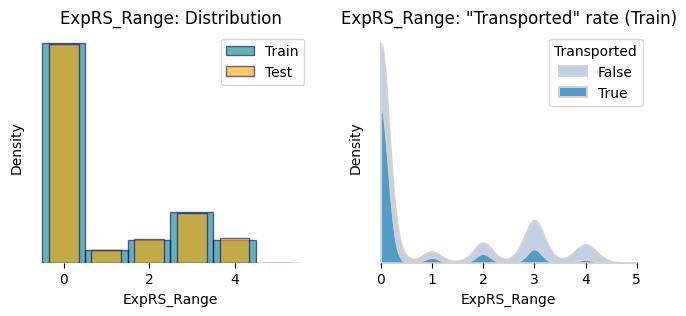

Explained ExpRS_Range values and Transported rates in training dataset:


ExpRS_Range,ExpRS,#Passengers,Transported_Rate[%]
0,"[0.1, 1)",5694,62.732591
1,"[1, 10)",322,37.576473
2,"[10, 100)",583,35.848442
3,"[100, 1000)",1313,23.990678
4,"[1000, 10000)",599,13.021485
5,"[10000, 100000)",1,0.000000


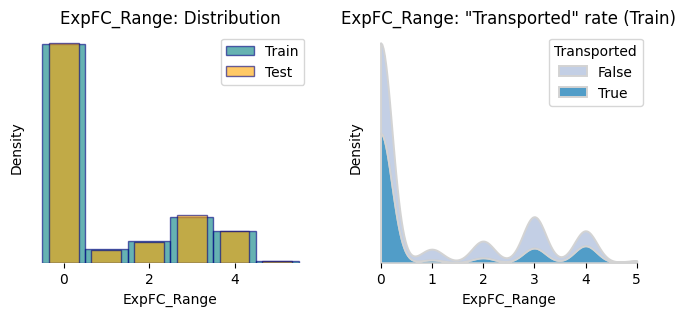

Explained ExpFC_Range values and Transported rates in training dataset:


ExpFC_Range,ExpFC,#Passengers,Transported_Rate[%]
0,"[0.1, 1)",5572,58.327246
1,"[1, 10)",347,20.460505
2,"[10, 100)",554,22.382267
3,"[100, 1000)",1174,31.430737
4,"[1000, 10000)",811,52.527096
5,"[10000, 100000)",52,74.985580


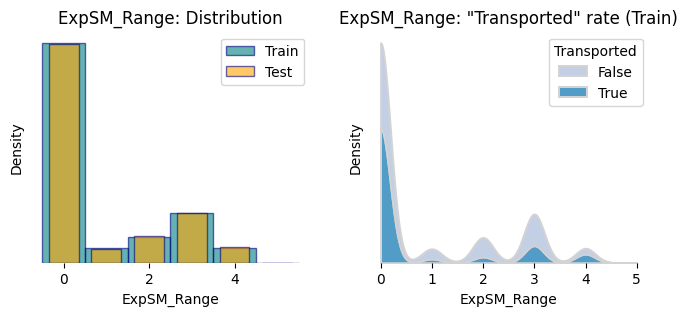

Explained ExpSM_Range values and Transported rates in training dataset:


ExpSM_Range,ExpSM,#Passengers,Transported_Rate[%]
0,"[0.1, 1)",5740,58.919758
1,"[1, 10)",375,24.799339
2,"[10, 100)",684,20.906127
3,"[100, 1000)",1305,32.796684
4,"[1000, 10000)",377,57.292910
5,"[10000, 100000)",4,49.875312


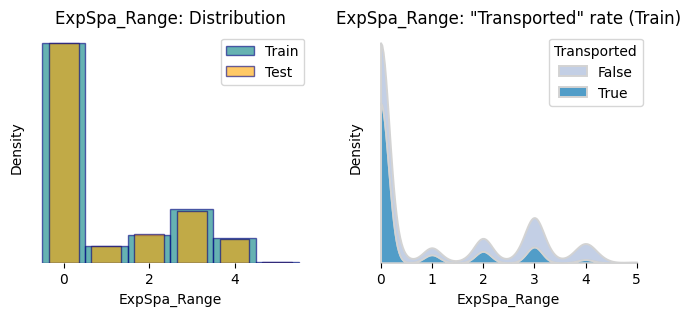

Explained ExpSpa_Range values and Transported rates in training dataset:


ExpSpa_Range,ExpSpa,#Passengers,Transported_Rate[%]
0,"[0.1, 1)",5470,63.162590
1,"[1, 10)",405,42.714995
2,"[10, 100)",681,36.269658
3,"[100, 1000)",1325,25.811126
4,"[1000, 10000)",605,11.570057
5,"[10000, 100000)",24,0.000000


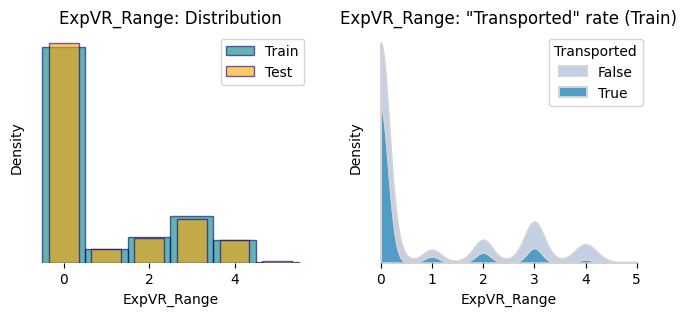

Explained ExpVR_Range values and Transported rates in training dataset:


ExpVR_Range,ExpVR,#Passengers,Transported_Rate[%]
0,"[0.1, 1)",5634,62.087217
1,"[1, 10)",362,39.501671
2,"[10, 100)",660,35.150983
3,"[100, 1000)",1228,27.035610
4,"[1000, 10000)",593,12.647342
5,"[10000, 100000)",28,0.000000


In [24]:
# Plot distribution of values, survival rates and explain ranged-values:
for feat in exp_feats:
    feat_range = feat+'_Range' # Engineered feature
    fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(8, 3)) 
    plot_dist_hist(train_df_SF,test_df_SF,feat_range,ax1,bin_step=1)
    plot_KDE(train_df_SF,feat_range,ax2)    
    plt.show()
    explain_range_values(train_df_SF,feat) # Explained values:

Information is much simpler now and easier to visualize. There are some general highlights:

* For all new ranged-features, the most common category is 0, integrated mainly by passengers with zero expenses. **Transported** rates in all cases are close to 60%.

* Ignoring the category 0, expenses follow two opposite patterns:

  - For <span style="font-weight:bold;">ExpRS_Range</span>, <span style="font-weight:bold;">ExpSpa_Range</span> and <span style="font-weight:bold;">ExpVR_Range</span>: the <span style="color:green">higher the expense</span>, the <span style="color:red">worse Transported rate</span>.
  
  - For <span style="font-weight:bold;">ExpFC_Range</span> and <span style="font-weight:bold;">ExpSM_Range</span>: the <span style="color:green">higher the expense</span>, the <span style="color:green">better Transported rate</span>.

<a id="DA_FE_Name"></a>
### <span style="color:teal;font-weight:bold;">"Name" feature: new feature "Ocurrence_LastName"</span>

Is there any encoded information in the <span style="font-weight:bold;">Name</span> feature? Let's see a few examples:

In [25]:
train_df['Name'].head(10)

0       Maham Ofracculy
1          Juanna Vines
2         Altark Susent
3          Solam Susent
4     Willy Santantines
5     Sandie Hinetthews
6    Billex Jacostaffey
7    Candra Jacostaffey
8         Andona Beston
9        Erraiam Flatic
Name: Name, dtype: object

Names come in the format "FirstName LastName". People bearing the same last name are likely belonging to the same family. 

Then, I create a new feature <span style="font-weight:bold;">Ocurrence_LastName</span>, which records the ocurrence of the last name for each passenger.

In [26]:
# Create Name_Last feature (temporarily):
if 'Name_Last' not in train_df_SF: # In case faeture it's already created
    # Training dataset:
    train_df_SF['Name_Last'] = train_df['Name'].apply(
        lambda x: np.nan if x!=x else (
            x.split(' ')[-1]))
    # Testing dataset:
    test_df_SF['Name_Last'] = test_df['Name'].apply(
        lambda x: np.nan if x!=x else (
            x.split(' ')[-1]))
    
# Identify ocurrences for every unique value in Name_Last:
ocurrences = pd.concat([train_df_SF['Name_Last'], test_df_SF['Name_Last']]).value_counts().to_dict()
for dataset in [train_df_SF,test_df_SF]:
    dataset['Ocurrence_LastName'] = dataset['Name_Last'].apply(
        lambda x: np.nan if x!=x else ocurrences[x])

# Drop unnecessary features:
for feature in ['Name','Name_Last']:
    if feature in train_df_SF: # Just in case feature is already dropped
        train_df_SF = train_df_SF.drop(feature,axis=1)
        test_df_SF = test_df_SF.drop(feature,axis=1)

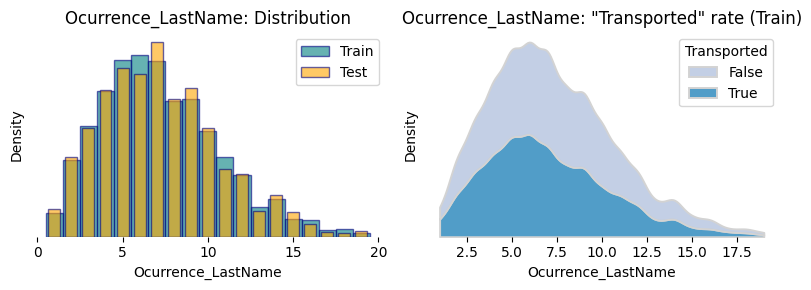

---------- Outer:train, Inner:test ----------


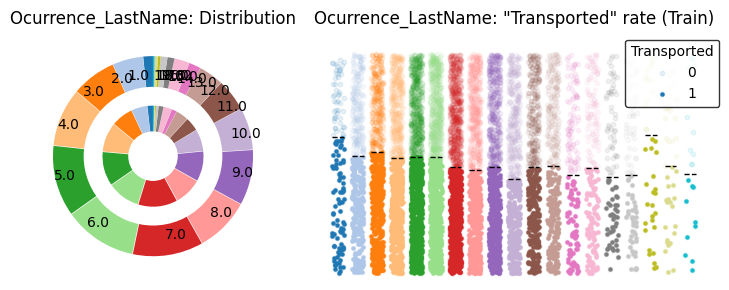

In [27]:
# Plot distribution of values and Transported rates:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(8, 3)) # Start figure
plot_dist_hist(train_df_SF,test_df_SF,'Ocurrence_LastName',ax1,bin_step=1)
plot_KDE(train_df_SF,'Ocurrence_LastName',ax2)     
fig.tight_layout()
plt.show()
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(8, 3)) # Start figure
print('-'*10,'Outer:train, Inner:test','-'*10)
plot_dist_pie(train_df_SF,test_df_SF,'Ocurrence_LastName',ax1)
plot_swarm(train_df_SF,'Ocurrence_LastName',ax2,xlabels_off=True)    
fig.tight_layout()
plt.show()

With a few exceptions, the general behavior indicates that the more ocurrences in the last name, the worse Transported rate.

<a id="Feature_engineering_single_corr"></a>
### <span style="color:teal;font-weight:bold;">Correlations II (original and single engineered features)</span>

So far, I've modified, dropped or generated new features from single original features. Let's have a look at the correlation at the current dataset:

In [28]:
print('\nFeatures: names and data types:\n')
print(test_df_SF.dtypes)


Features: names and data types:

HomePlanet             object
CryoSleep             float64
Destination            object
Age                   float64
VIP                   float64
ExpRS                 float64
ExpFC                 float64
ExpSM                 float64
ExpSpa                float64
ExpVR                 float64
GroupMembers            int64
Cabin_1st              object
Cabin_isP             float64
ExpRS_Range           float64
ExpFC_Range           float64
ExpSM_Range           float64
ExpSpa_Range          float64
ExpVR_Range           float64
Ocurrence_LastName    float64
dtype: object


All features are numeric, except for <span style="font-weight:bold;">HomePlanet</span>, <span style="font-weight:bold;">Destination</span> and <span style="font-weight:bold;">Cabin_1st</span>, which have 3, 3 and 8 categories, respectively. I will encode them and then plot the correlation matrix.

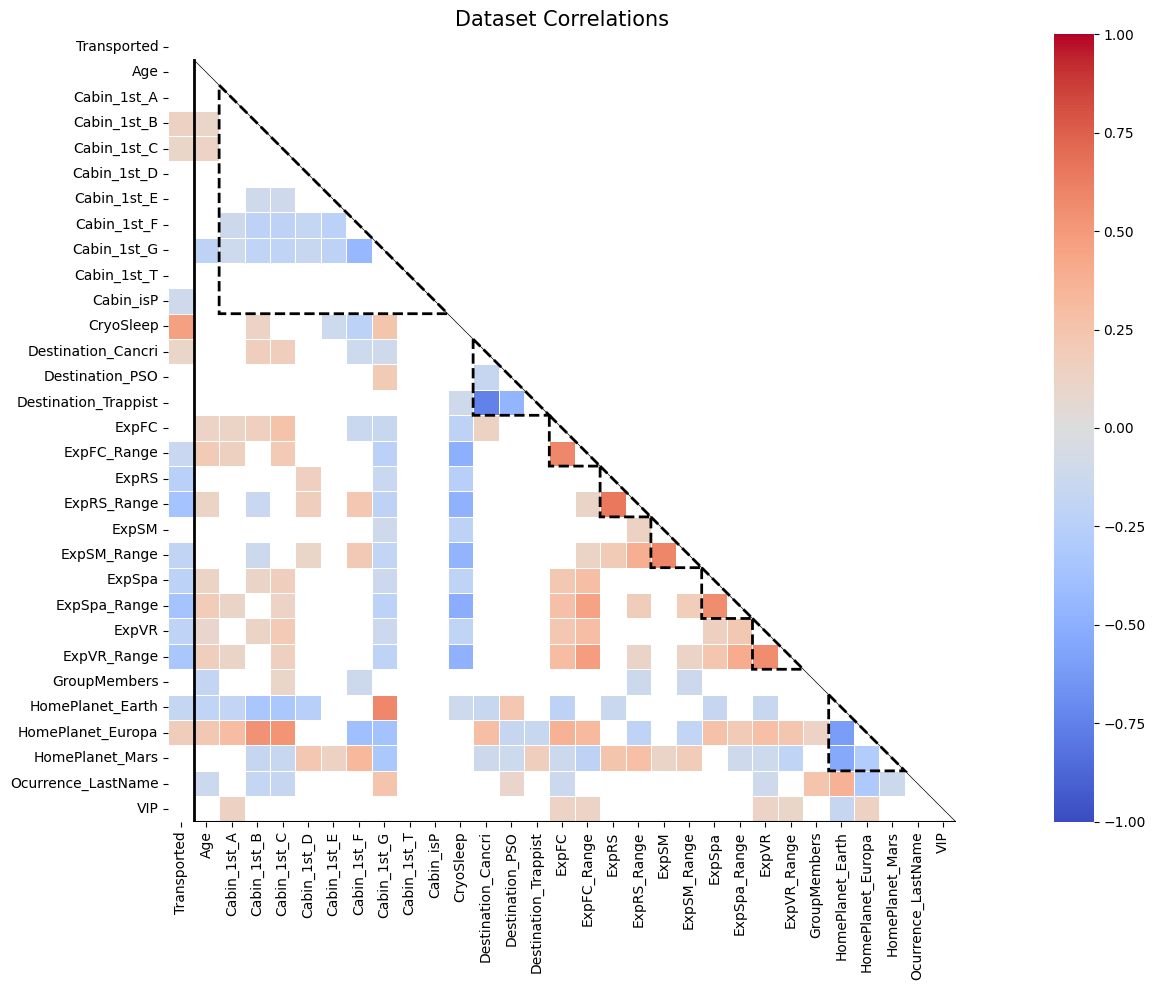

In [29]:
train_df_SF_enc = encode_and_correlation(train_df_SF)
test_df_SF_enc = encode_and_correlation(test_df_SF,plot_corr=False)

Compared to the first correlation matrix (original dataset), I can extract new conclusions:

- <span style="font-weight:bold;">Cabin_1st_A</span>, <span style="font-weight:bold;">Cabin_1st_B</span> and <span style="font-weight:bold;">Cabin_isP</span> are noticeably correlated with <span style="font-weight:bold;">Transported</span>.

- The <span style="font-weight:bold;">Cabin_1st_X</span> family of features is significantly correlated to the other features, specially <span style="font-weight:bold;">HomePlanet</span>.

- <span style="font-weight:bold;">Ocurrence_LastName</span> has moderate correlations, specially with <span style="font-weight:bold;">HomePlanet</span> and some <span style="font-weight:bold;">Cabin_1st_X</span>.

Next, I move on to engineering new features based on the combination of two or more features.

<a id="Feature_engineering_combined"></a>
## <span style="color:teal;font-weight:bold;">Combined features</span>

I copy the engineered datasets "SF" and label them as "CF" (Combined Features).. They will contain all original features, those engineered from single features and those engineered from combined features:

In [30]:
train_df_CF, test_df_CF = train_df_SF.copy(), test_df_SF.copy()

<a id="DA_FE_FromTo"></a>
### <span style="color:teal;font-weight:bold;">"FromTo" new feature (from "HomePlanet" and "Destination")</span>

In the Spaceship Titanic voyage, <span style="font-weight:bold;">the itinerary for any passenger can be defined by their HomePlanet feature and Destination</span>. Possibilities are limited: from [Earth, Europa, Mars] to [Cancri, PSO, Trappist].

<span style="font-weight:bold;">I will create a new feature called FromTo, containing strings with the format "{HomePlanet}-{Destination}".</span> 

<span style="font-style:italic;">Note: Any missing value in either <span style="font-weight:bold;">HomePlanet</span> or <span style="font-weight:bold;">Destination</span> will be translated in a missing value in <span style="font-weight:bold;">FromTo</span>.</span>

In [31]:
# Define feature:
for dataset in [train_df_CF, test_df_CF]:
    dataset["FromTo"] = dataset["HomePlanet"] + '-' + dataset["Destination"]

----------  FromTo | Outer:train, Inner:test ----------


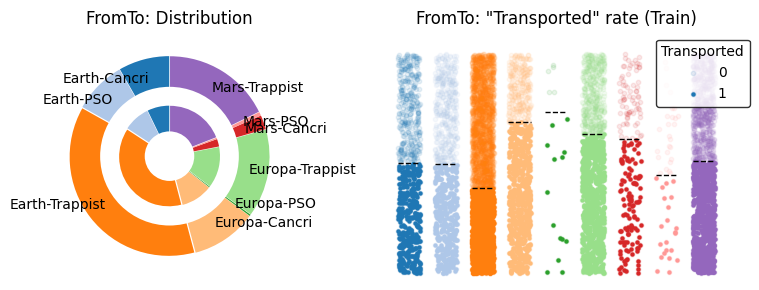

Explained FromTo values and transported rates in training dataset:


FromTo,#Passengers,Transported_Rate[%]
Earth-Cancri,690,50.434783
Earth-PSO,712,49.859551
Earth-Trappist,3101,38.922928
Europa-Cancri,886,68.961625
Europa-PSO,19,73.684211
Europa-Trappist,1189,63.498738
Mars-Cancri,193,61.139896
Mars-PSO,49,44.897959
Mars-Trappist,1475,51.186441


In [32]:
# Plot distribution of values and Transported rates:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(8, 3)) # Start figure
print('-'*10,f' FromTo | Outer:train, Inner:test','-'*10)
plot_dist_pie(train_df_CF,test_df_CF,"FromTo",ax1)
plot_swarm(train_df_CF,"FromTo",ax2,xlabels_off=True)    
fig.tight_layout()
plt.show()
# Display explanatory table:
explain_stats(train_df_CF,"FromTo")

<a id="DA_FE_Expense_ratio"></a>
### <span style="color:teal;font-weight:bold;">Expense-related new family of features (from "ExpFC", "ExpSM", "ExpRS", "ExpSpa" and "ExpVR")</span>

I've already made ranged-expenses for all expenditure features, but now I'll work with the original ones in order to explore the following options:

* Total sum of expenses: new feature named <span style="font-weight:bold;">TotalExp</span>.
* Ratio between two expenses X and Y, new features named <span style="font-weight:bold;">X_over_Y</span>.

The first option (sum) will have a wide range of values, then I make a ranged-version as well: <span style="font-weight:bold;">TotalExp_Range</span>. 

The second option (ratios) will also display a wide range of values, close to 0 when the X feature is much smaller than the Y feature, or many orders of magnitude (100,1000,etc.) in the opposite case. Therefore, I make ranged-versions as well: <span style="font-weight:bold;">X_over_Y_Range</span>.

Let's start with the <span style="font-weight:bold;">TotalExp</span> features:

In [33]:
# Create 'TotalExp' feature:
if 'TotalExp' not in test_df_CF:
    for dataset in [train_df_CF,test_df_CF]:
        dataset['TotalExp'] = dataset['ExpFC']+dataset['ExpSM']+\
        dataset['ExpRS']+dataset['ExpSpa']+dataset['ExpVR']
# Create 'TotalExp_Range' feature:
train_df_CF, test_df_CF = make_range_feature(
    train_df_CF,test_df_CF,'TotalExp',zero_value=1)

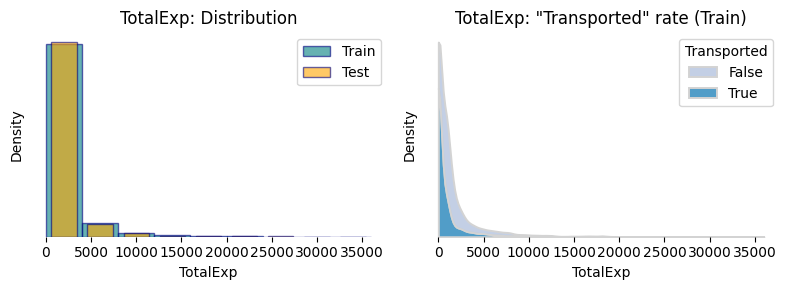

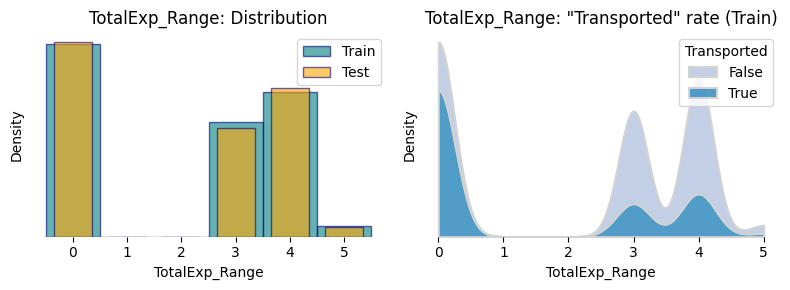

Explained TotalExp_Range values and Transported rates in training dataset:


TotalExp_Range,TotalExp,#Passengers,Transported_Rate[%]
0,"[0.1, 1)",3247,78.379802
1,"[1, 10)",0,0.000000
2,"[10, 100)",0,0.000000
3,"[100, 1000)",1929,29.600676
4,"[1000, 10000)",2436,30.459645
5,"[10000, 100000)",173,31.212069


In [34]:
# Plot distribution of values, survival rates and explain ranged-values:
for feat in ['TotalExp','TotalExp_Range']:
    fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(8, 3)) # Start figure
    bin_step = 1 if feat=='TotalExp_Range' else None
    plot_dist_hist(train_df_CF,test_df_CF,feat,ax1,bin_step=bin_step)
    plot_KDE(train_df_CF,feat,ax2)     
    fig.tight_layout()
    plt.show()
explain_range_values(train_df_CF,'TotalExp')

Good news, <span style="font-weight:bold;">TotalExp_Range</span> separates the data into two groups with similar Transported rates: either very low expenses (range value 0, including zero expenses), with high Transported rate (78%) or at least 100 expenses (range values 3,4,5), with low transported rates (30%).

I will keep this ranged-feature and drop <span style="font-weight:bold;">TotalExp</span>.

In [35]:
if 'TotalExp' in train_df_CF: # Just in case feature is already dropped
    train_df_CF = train_df_CF.drop('TotalExp',axis=1)
    test_df_CF = test_df_CF.drop('TotalExp',axis=1)

Now let's create the ratio-expenses and their ranged versions:

In [36]:
# Create ratio-expenses:
expenses = ['ExpFC','ExpSM','ExpRS','ExpSpa','ExpVR']
for feat1 in expenses:
    for feat2 in {feat for feat in expenses if feat!=feat1}:
        feat_ratio = f'{feat1}_over_{feat2}' # Feature name (Ratio)
        if feat_ratio not in test_df_CF:
            for dataset in [train_df_CF,test_df_CF]:
                dataset[feat_ratio] = dataset[feat1]/(dataset[feat2]+0.01)
# Create ranged-ratio-expenses features:
ratio_feats = [col for col in test_df_CF.columns if 
               '_over_' in col and '_Range' not in col]
for feat in ratio_feats:
    train_df_CF, test_df_CF = make_range_feature(
        train_df_CF,test_df_CF,feat,zero_value=1)

As there are 5 original expenses categories, the number of ratio-features for all possible combinations is 5x4=20. Most probably, information will be repetitive along these variations, then it's important to select the most important features. Therefore, I study the correlation matrix, focusing on the Transported-correlation (first column):

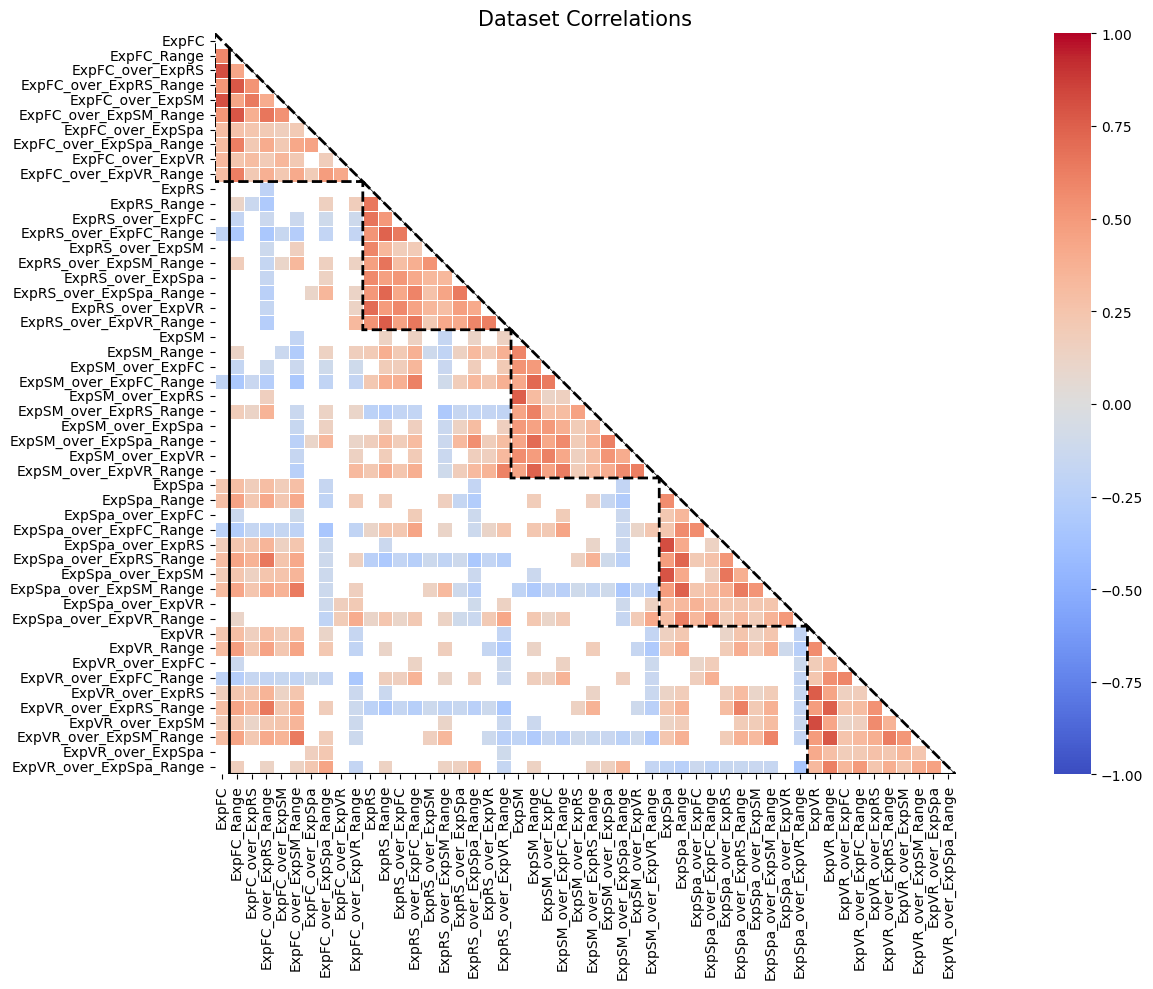

In [37]:
exp_feats = [feat for feat in train_df_CF.columns if 
            'ExpFC' in feat or 'ExpSM' in feat or 'ExpRS' in feat
             or 'ExpSpa' in feat or 'ExpVR' in feat in feat]
train_df_CF_enc = encode_and_correlation(train_df_CF[exp_feats])

From this plot, I select those features which **Transported**-correlation are painted (higher than the 0.1 threshold), with the following considerations:

- For the ranged-features, I only keep either the original version or the ranged-version, whichever is most **Transported**-correlated.

- For the ratio-features, in the case that inverse features <span style="font-weight:bold;">X_over_Y</span> and <span style="font-weight:bold;">Y_over_X</span> are both painted, I only keep the one most **Transported**-correlated.

The final selection is shown below, separated by families:

- <span style="font-weight:bold;">ExpFC_Range</span>, <span style="font-weight:bold;">ExpFC_over_ExpRS</span>, <span style="font-weight:bold;">ExpFC_over_ExpSM</span>, <span style="font-weight:bold;">ExpFC_over_ExpSpa</span>, <span style="font-weight:bold;">ExpFC_over_ExpVR</span>.

- <span style="font-weight:bold;">ExpSpa_Range</span>, <span style="font-weight:bold;">ExpSpa_over_ExpRS_Range</span>, <span style="font-weight:bold;">ExpSpa_over_ExpSM_Range</span>.
  
- <span style="font-weight:bold;">ExpVR_Range</span>, <span style="font-weight:bold;">ExpVR_over_ExpRS_Range</span>, <span style="font-weight:bold;">ExpVR_over_ExpSM_Range</span>

In [38]:
select_feats = ['ExpFC_Range','ExpFC_over_ExpRS','ExpFC_over_ExpSM',
                'ExpFC_over_ExpSpa','ExpFC_over_ExpVR','ExpSpa_Range',
                'ExpSpa_over_ExpRS_Range','ExpSpa_over_ExpSM_Range',
                'ExpVR_Range','ExpVR_over_ExpRS_Range','ExpVR_over_ExpSM_Range'
                ]
delete_feats = [feat for feat in test_df_CF.columns if 
                ('ExpFC' in feat or 'ExpRS' in feat or 'ExpSM' in feat or
                'ExpSpa' in feat or 'ExpVR' in feat) and (feat not in select_feats)
               ]
for feature in delete_feats:
    if feature in train_df_CF: # Just in case feature is already dropped
        train_df_CF = train_df_CF.drop(feature,axis=1)
        test_df_CF = test_df_CF.drop(feature,axis=1)

Expense-features are many and hard to visualize except for the ranged-versions. As an example, I plot two of them:

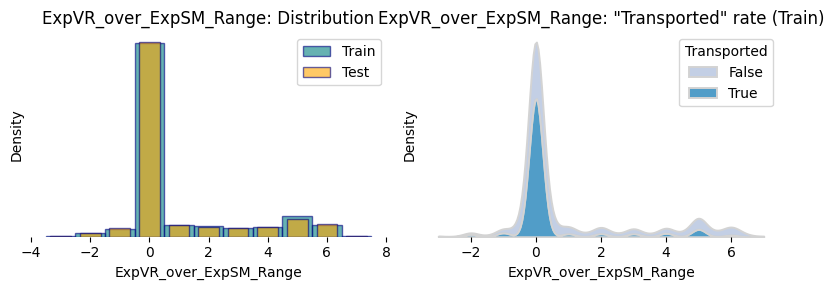

Explained ExpVR_over_ExpSM_Range values and Transported rates in training dataset:


ExpVR_over_ExpSM_Range,ExpVR_over_ExpSM,#Passengers,Transported_Rate[%]
-3,"[0.0001, 0.001)",17,52.910053
-2,"[0.001, 0.01)",118,51.690535
-1,"[0.01, 0.1)",231,41.989524
0,"[0.1, 1)",5726,60.565734
1,"[1, 10)",333,21.921264
2,"[10, 100)",323,23.528683
3,"[100, 1000)",269,27.508271
4,"[1000, 10000)",283,30.387619
5,"[10000, 100000)",625,29.599526
6,"[100000, 1000000)",357,11.764376


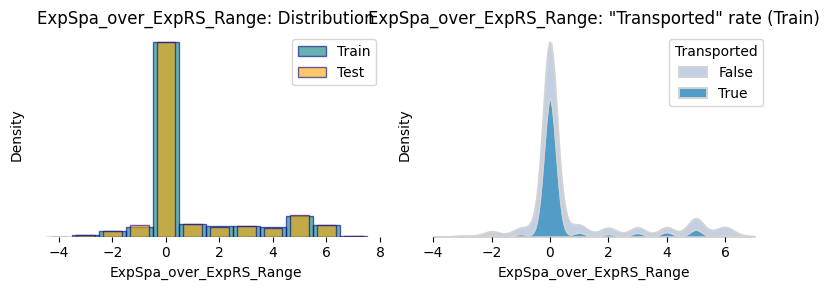

Explained ExpSpa_over_ExpRS_Range values and Transported rates in training dataset:


ExpSpa_over_ExpRS_Range,ExpSpa_over_ExpRS,#Passengers,Transported_Rate[%]
-4,"[1e-05, 0.0001)",1,0.000000
-3,"[0.0001, 0.001)",38,15.785320
-2,"[0.001, 0.01)",179,24.579632
-1,"[0.01, 0.1)",277,26.713837
0,"[0.1, 1)",5609,61.419038
1,"[1, 10)",377,28.381210
2,"[10, 100)",298,24.831381
3,"[100, 1000)",298,34.227039
4,"[1000, 10000)",291,42.266589
5,"[10000, 100000)",604,29.966391


In [39]:
# Plot distribution of values, survival rates and explain ranged-values:
feats = ['ExpVR_over_ExpSM_Range','ExpSpa_over_ExpRS_Range']
for feat in feats:
    fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(8, 3)) # Start figure
    bin_step = 1 if '_Range' in feat else None
    plot_dist_hist(train_df_CF,test_df_CF,feat,ax1,bin_step=bin_step)
    plot_KDE(train_df_CF,feat,ax2)     
    fig.tight_layout()
    plt.show()
    if '_Range' in feat:
        explain_range_values(train_df_CF,feat[:-6])

<a id="Feature_engineering_corr3"></a>
### <span style="color:teal;font-weight:bold;">Correlations III (all features)</span>

Let's visualize the correlations for all features:

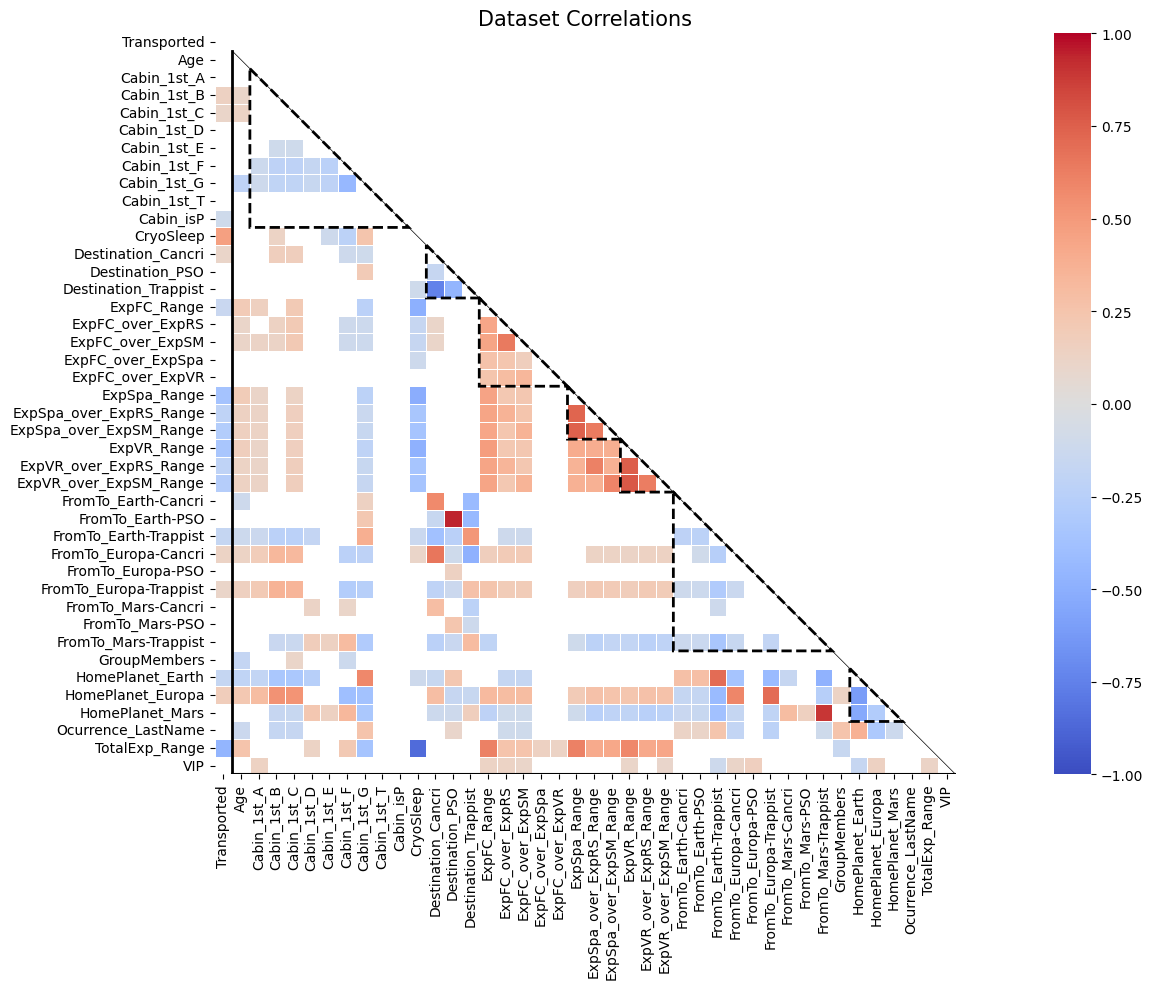

In [40]:
# Encode features:
train_df_CF_enc = encode_and_correlation(train_df_CF) # Training dataset (to be plotted)
test_df_CF_enc = encode_and_correlation(test_df_CF,plot_corr=False) # Testing dataset (not plotted)

<a id="Submission_results"></a>
# <span style="color:teal;font-weight:bold;">Submission results</span>

As the final stage of this notebook, <span style="font-weight:bold;">after engineering features I will test the improved dataset and make many submissions</span>. As an internal benchmark, <span style="font-weight:bold;">the best score that I got using the original dataset was 0.79635</span> (see <a href="https://www.kaggle.com/code/fertmeneses/spaceship-titanic-getting-familiar/edit/run/191353629">Spaceship Titanic 🏁 Getting familiar</a>).

Since some Machine Learning models don't accept NaN values, I correct the missing values with the following criteria:

* Numeric features: assign mean value.

* Non-numeric features: assign mode value.

In [41]:
# Simple correction for dataset:
def simple_data_correction(df,target_col='Transported'):
    """
    Corrects missing values using the average value for numeric features
    or most frequent value for non-numeric features.
    --- Inputs ---
    {df} [Dataframe]: Dataframe to be corrected.
    {target_col} [String]: Target column in the dataframe (won't be corrected)
    --- Outputs ---
    {df_corrected} [Dataframe]: Corrected Dataframe.
    """
    df_corrected = df.copy()
    # Determine column types:
    col_numeric = [col for col in df.columns if 
                   df[col].dtypes != 'object' and col!=target_col]
    col_object = [col for col in df.columns if 
                  col not in col_numeric and col!=target_col]
    # Correct numeric columns:
    for col in col_numeric:
        df_corrected[col] = df[col].fillna(value=df[col].mean())
    # Correct non-numeric columns:
    for col in col_object:
        most_freq = df[col].value_counts(sort=True).index[0]
        df_corrected[col] = df[col].fillna(value=most_freq)
    return df_corrected

<a id="Try_models"></a>
## <span style="color:teal;font-weight:bold;">Try models</span>

In the following lines, there are a few options for ML models and subsets of features. This code runs for individual models, which I submit one by one and store the results in a separate file.

In [42]:
# Train ML models and export the submission file:
from sklearn.ensemble import (RandomForestClassifier, 
                              GradientBoostingClassifier)
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

def train_submit_ML(model,train_df,test_df):
    """
    Trains a ML model, and saves the submission file.
    --- Inputs ---
    {model} [Machine Learning model]: ML model to be trained.
    {train_df} [Dataframe]: Training dataset, it must contain the
    columns "PassengerId" and "Transported".
    {test_df} [Dataframe]: Testing dataset, it must contain the
    column "PassengerId".
    --- Outputs ---
    {train_score} [Float]: Training score.
    """
    # Extract PassengerId and Transported columns, if applicable:
    passID_train = train_df['PassengerId']
    passID_test = test_df['PassengerId']
    y_train = train_df['Transported']
    x_train = train_df.drop(['PassengerId','Transported'],axis=1)
    x_test = test_df.drop('PassengerId',axis=1)
    # Initialize model with fixed seed if possible:
    if 'random_state' in dir(model):
        model.random_state = 0 
    # Train the model:
    model.fit(x_train,y_train)
    train_score = model.score(x_train,y_train) # Get training score
    # Make submission:
    preds = model.predict(x_test)
    preds = preds.astype(bool) # Ensure the values are boolean
    df_subm = pd.DataFrame({
        "PassengerId": passID_test,
        "Transported": preds
    }).to_csv('submission.csv', index=False)
    # Final output and message:
    print("Training score:", np.round(train_score,4))
    print("Submission file ready.")
    return train_score, preds

In [43]:
# ML Options:
# RandomForestClassifier(n_estimators=100, max_depth=5)
# GradientBoostingClassifier(n_estimators=100, max_depth=3)
# XGBClassifier(n_estimators=100, max_depth=3)

# Features options:
# CE: ALL features (Original + Engineered)
# SE: Original + Engineered based on single-features

# Select subset of features:
feats = 'SF'

# Prepare datasets:
if feats == 'CF':
    df_subm_train = pd.concat([train_ID,simple_data_correction(train_df_CF_enc)],axis=1)
    df_subm_test = pd.concat([test_ID,simple_data_correction(test_df_CF_enc)],axis=1)
elif feats == 'SF':
    df_subm_train = pd.concat([train_ID,simple_data_correction(train_df_SF_enc)],axis=1)
    df_subm_test = pd.concat([test_ID,simple_data_correction(test_df_SF_enc)],axis=1)
# Define and train simple model:   
model = GradientBoostingClassifier(n_estimators=300, max_depth=3)
train_score, preds = train_submit_ML(model,df_subm_train,df_subm_test)

Training score: 0.8392
Submission file ready.


<a id="Analyze_results"></a>
## <span style="color:teal;font-weight:bold;">Analyze results</span>

Let's compare the results of all my submitted ML models, using the competition public Leaderboard (LB) as a reference, as well as my previous best score 0.79635.

In [44]:
# Load leaderboard scores and calculate quantiles and median:
LB_file = "kaggle/Leaderboard/spaceship-titanic-publicleaderboard-2024-08-01.csv"
LB_scores = pd.read_csv(LB_file)['Score'] # Scores (fractions from 0 to 1)
# Set reference values and calculate the percentaje of scores between them:
quantile_1, quantile_3 = LB_scores.quantile([0.25,0.75])
median = LB_scores.median()

from matplotlib.pyplot import cm

def plot_training_submission_scores(df_results,sort_by='Model',benchmark=None):
    """
    Plots training vs submission scores, grouped by ML groups.
    --- Inputs ---
    {df_results} [DataFrame]: Results for all trained groups, 
    must include the following columns:
    'Model','train_score','subm_score', and the {sort_by} feature.
    {sort_by} [String]: Feature by which the results are grouped.
    {benchmark} [Float or None]: benchmark score. Select None if there is none.
    """
    # Identify groups:
    groups = sorted(set(df_results[sort_by])) 
    
    # Plot figures:
    markers = ["o","<","s","d","v","p","P","^","*","D",">"]
    colors_groups = cm.turbo(np.linspace(0, 1, len(groups)))
    fig, ax = plt.subplots(figsize=(7,4))
    for j,group in enumerate(groups):
        data = df_results[df_results[sort_by]==group]
        ax.scatter(data['subm_score'],data['train_score'],
                   marker=markers[(j) % len(markers)],
                   s=70,edgecolor='k',color=colors_groups[j],
                   alpha=0.7,label=sort_by+' '+group)    
    range_subm_score = [min(df_results['subm_score'])*0.995,
                        max(df_results['subm_score'])*1.005]
    # Additional configuration:
    ax.axvspan(quantile_1, quantile_3, alpha=0.1, color='green',
               label='$1^{st}$ to $3^{rd}$ quantiles (LB)')
    ax.axvline(median,ls='--',lw=1.5,color='r',
               label='Median Score (LB)',alpha=0.8)
    if benchmark is not None:
        ax.axvline(benchmark,ls=':',lw=1.5,color='b',
                   label='Benchmark',alpha=0.8)
    ax.plot(range_subm_score,range_subm_score,'--k',alpha=0.5,
            label='Ideal training')
    ax.set(xlabel="Submission Score",ylabel="Training score")
    ax.legend(ncol=1,loc='upper left')
    fig.tight_layout()
    plt.show()

Top 3 models:


,Feats_subset,Model,n_estimators,max_depth,subm_score,train_score
0,SF,GradientBoostingClassifier,50,5,0.80336,0.8334
1,SF,GradientBoostingClassifier,100,5,0.80313,0.8515
2,SF,GradientBoostingClassifier,100,3,0.80289,0.8173


Training vs Submission scores for all models:


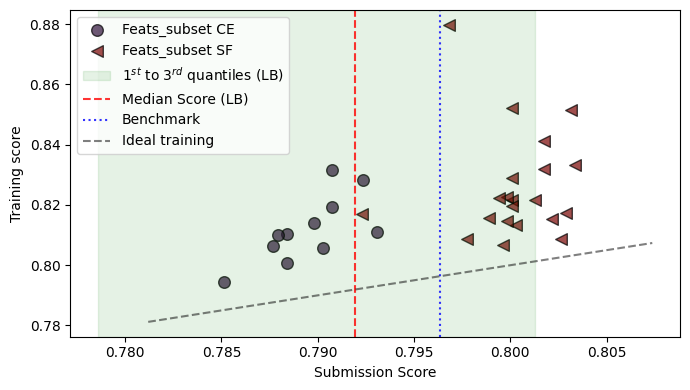

In [47]:
# Load pre-trained results:
df_results = pd.read_csv('kaggle/Training_results/Pretrained_Feature_Engineering.csv')
# Display table with 5 best models:
print('Top 3 models:')
display(df_results[
    ["Feats_subset","Model","n_estimators","max_depth","subm_score","train_score"]
].sort_values(["subm_score"],ascending=False).head(3))
# Plot training vs submission scores:
print('Training vs Submission scores for all models:')
plot_training_submission_scores(df_results,sort_by='Feats_subset',
                                benchmark=0.79635)

Looking at these results, I conclude the following:

- As some scores are better than my previous benchmark (using minimally edited data), it's clear that **engineering features improves the ML performance**. In fact, the new best result 0.80336	overcomes the 3rd quantile from the LB (75% of submissions)!
  
- **Using ALL engineered features (subset CE) is not a good choice**, since all ML models using them perform worse than the benchmark.

- **There is overfitting in all ML models**, and the best training score does not correlate with the best submission score.

<a id="Conclusions"></a>
# <span style="color:teal;font-weight:bold;">Conclusions</span>

**Feature engineering proved to be a useful technique to enhance ML performance, improving my previous 0.79635 score (using minimally data) to 0.80336**. I'm still below my goal score of 0.81, but I haven't corrected the missing values in the dataset nor optimized the ML hyperparameters yet!

Furthermore, it became clear in the previous section that **choosing a subset of features strongly affects the ML performance**. For this notebook, I just selected either all features (CE) or single-engineered features (SE), but there are many combinations worth exploring. I'm also aware that there must be good engineering features that I'm missing!

**All these improvements will be implemented in the future notebooks of this series**. The point here was to make a good feature enginnering process (although not the best) and check how the results improved compared to the original data.

Stay tuned for the next episode! My next work will be focused on correcting the datasets (missing values, outliers), and hopefully I'll set a new benchmark score, closer to 0.81!

Thanks for reading! 😁